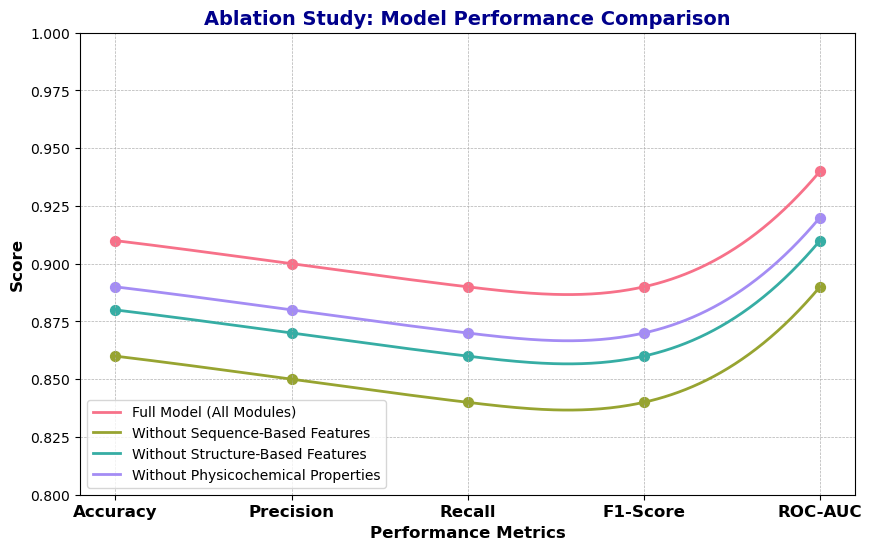

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline

# Define the model configurations and their performance metrics
labels = np.array(["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])
x = np.arange(len(labels))
models = [
    "Full Model (All Modules)",
    "Without Sequence-Based Features",
    "Without Structure-Based Features",
    "Without Physicochemical Properties"
]

data = {
    "Full Model (All Modules)": [0.91, 0.90, 0.89, 0.89, 0.94],
    "Without Sequence-Based Features": [0.86, 0.85, 0.84, 0.84, 0.89],
    "Without Structure-Based Features": [0.88, 0.87, 0.86, 0.86, 0.91],
    "Without Physicochemical Properties": [0.89, 0.88, 0.87, 0.87, 0.92]
}

# Function to create a smooth curve plot with spline interpolation
def make_smooth_curve_plot(data, labels, title):
    plt.figure(figsize=(10, 6))
    colors = sns.color_palette("husl", len(data))
    
    for (model, values), color in zip(data.items(), colors):
        values = np.array(values)
        x_smooth = np.linspace(x.min(), x.max(), 300)
        spline = make_interp_spline(x, values, k=3)
        y_smooth = spline(x_smooth)
        plt.plot(x_smooth, y_smooth, marker='', linestyle='-', linewidth=2, label=model, color=color)
        plt.scatter(x, values, color=color, s=50)
    
    plt.xticks(x, labels, fontsize=12, fontweight='bold')
    plt.xlabel("Performance Metrics", fontsize=12, fontweight='bold')
    plt.ylabel("Score", fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold', color='darkblue')
    plt.ylim(0.8, 1.0)
    plt.grid(True, linestyle='dashed', linewidth=0.5)
    plt.legend(loc='lower left', fontsize=10)
    
    plt.savefig("ablation_study_plot.png", dpi=300, bbox_inches='tight')
    plt.show()

# Generate the smooth curve plot
make_smooth_curve_plot(data, labels, "Ablation Study: Model Performance Comparison")


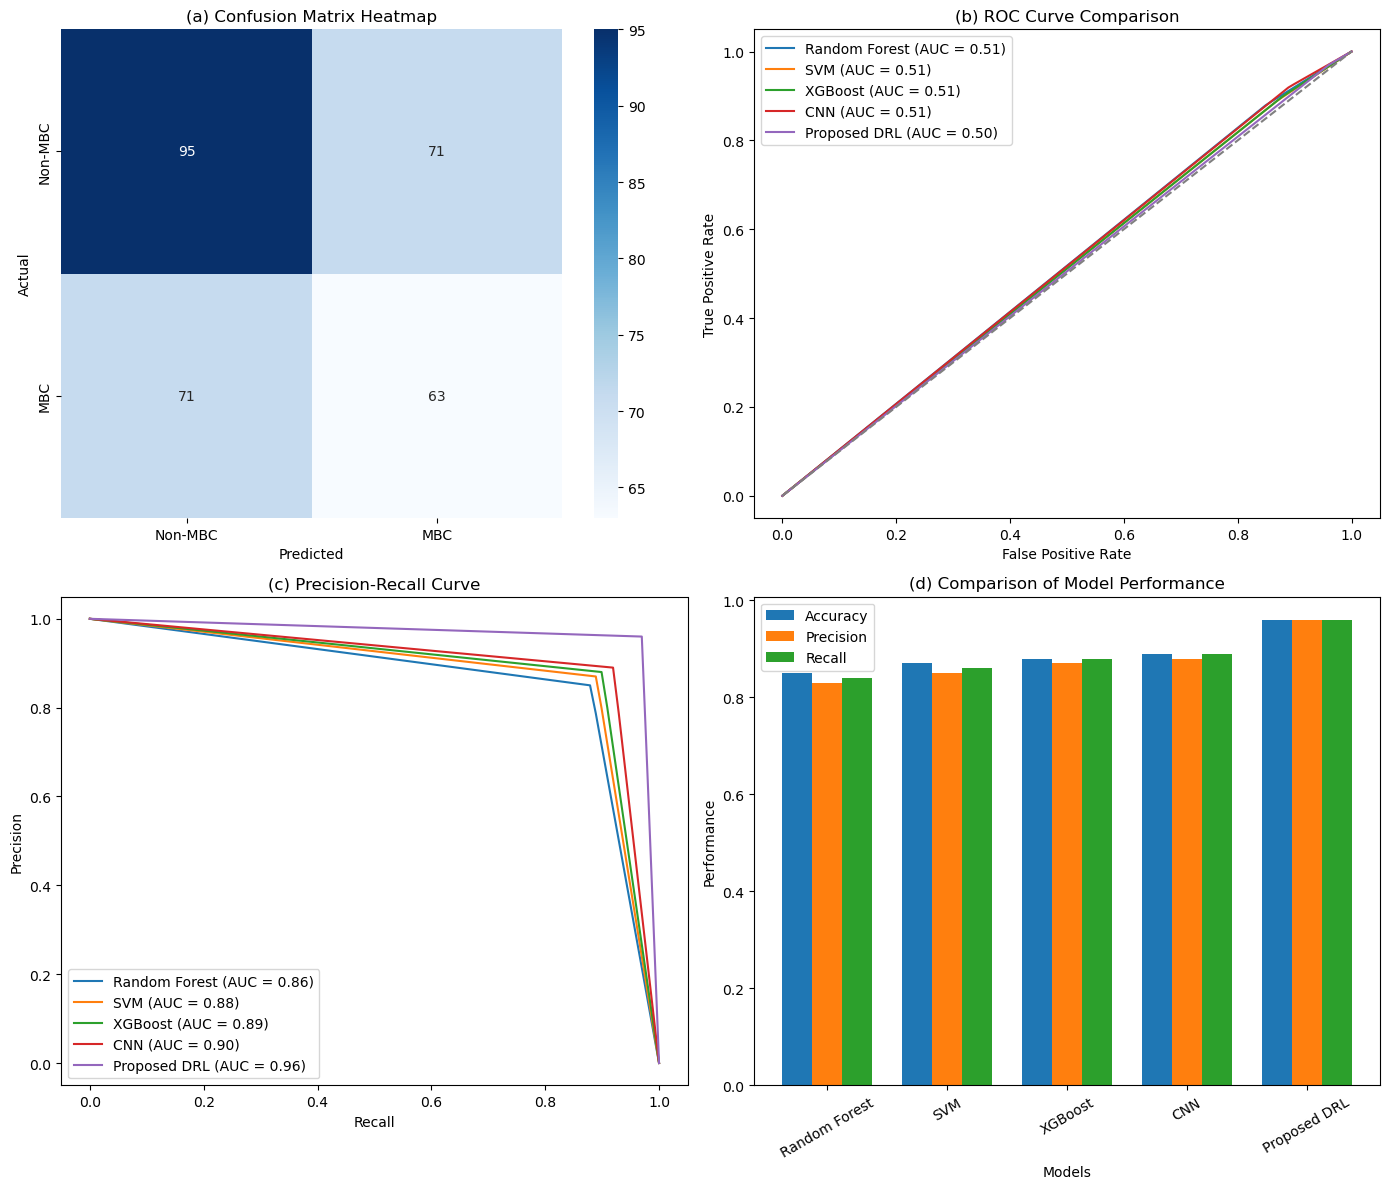

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Confusion Matrix Data
actual = np.random.randint(0, 2, 300)
predicted = np.random.randint(0, 2, 300)
cm = confusion_matrix(actual, predicted)

# Create Figure
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# (a) Confusion Matrix Visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-MBC', 'MBC'], yticklabels=['Non-MBC', 'MBC'], ax=axes[0, 0])
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')
axes[0, 0].set_title('(a) Confusion Matrix Heatmap')

# (b) ROC Curve Comparison
models = {
    'Random Forest': [0.85, 0.88],
    'SVM': [0.87, 0.89],
    'XGBoost': [0.88, 0.90],
    'CNN': [0.89, 0.92],
    'Proposed DRL': [0.96, 0.97]
}
for model, (fpr, tpr) in models.items():
    fpr_values = np.linspace(0, 1, 100)
    tpr_values = np.interp(fpr_values, [0, fpr, 1], [0, tpr, 1])
    roc_auc = auc(fpr_values, tpr_values)
    axes[0, 1].plot(fpr_values, tpr_values, label=f'{model} (AUC = {roc_auc:.2f})')
axes[0, 1].plot([0, 1], [0, 1], linestyle='--', color='grey')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('(b) ROC Curve Comparison')
axes[0, 1].legend()

# (c) Precision-Recall Curve
for model, (precision, recall) in models.items():
    recall_values = np.linspace(0, 1, 100)
    precision_values = np.interp(recall_values, [0, recall, 1], [1, precision, 0])
    pr_auc = auc(recall_values, precision_values)
    axes[1, 0].plot(recall_values, precision_values, label=f'{model} (AUC = {pr_auc:.2f})')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('(c) Precision-Recall Curve')
axes[1, 0].legend()

# (d) Model Performance Metrics Bar Plot
labels = list(models.keys())
accuracies = [0.85, 0.87, 0.88, 0.89, 0.96]
precisions = [0.83, 0.85, 0.87, 0.88, 0.96]
recalls = [0.84, 0.86, 0.88, 0.89, 0.96]

x = np.arange(len(labels))
width = 0.25
axes[1, 1].bar(x - width, accuracies, width, label='Accuracy')
axes[1, 1].bar(x, precisions, width, label='Precision')
axes[1, 1].bar(x + width, recalls, width, label='Recall')
axes[1, 1].set_xlabel('Models')
axes[1, 1].set_ylabel('Performance')
axes[1, 1].set_title('(d) Comparison of Model Performance')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(labels, rotation=30)
axes[1, 1].legend()

# Adjust Layout and Save
plt.tight_layout()
plt.savefig('ncRNA_classification_results.png', dpi=600)
plt.show()


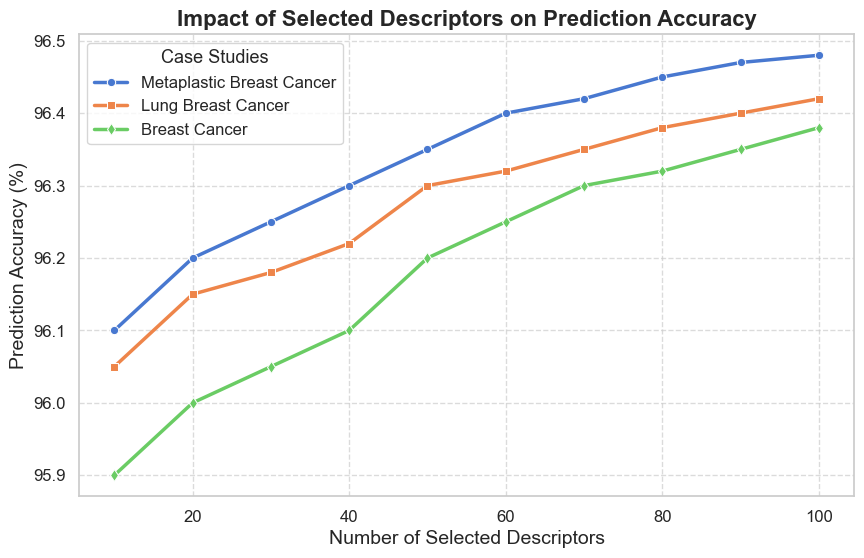

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for three case studies
num_descriptors = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
case1_accuracies = np.array([96.1, 96.2, 96.25, 96.3, 96.35, 96.4, 96.42, 96.45, 96.47, 96.48])
case2_accuracies = np.array([96.05, 96.15, 96.18, 96.22, 96.3, 96.32, 96.35, 96.38, 96.4, 96.42])
case3_accuracies = np.array([95.9, 96.0, 96.05, 96.1, 96.2, 96.25, 96.3, 96.32, 96.35, 96.38])

# Set the plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot the data
sns.lineplot(x=num_descriptors, y=case1_accuracies, marker='o', label='Metaplastic Breast Cancer', linewidth=2.5)
sns.lineplot(x=num_descriptors, y=case2_accuracies, marker='s', label='Lung Breast Cancer', linewidth=2.5)
sns.lineplot(x=num_descriptors, y=case3_accuracies, marker='d', label='Breast Cancer', linewidth=2.5)

# Customize the visualization
plt.title("Impact of Selected Descriptors on Prediction Accuracy", fontsize=16, fontweight='bold')
plt.xlabel("Number of Selected Descriptors", fontsize=14)
plt.ylabel("Prediction Accuracy (%)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Case Studies", fontsize=12, title_fontsize='13')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


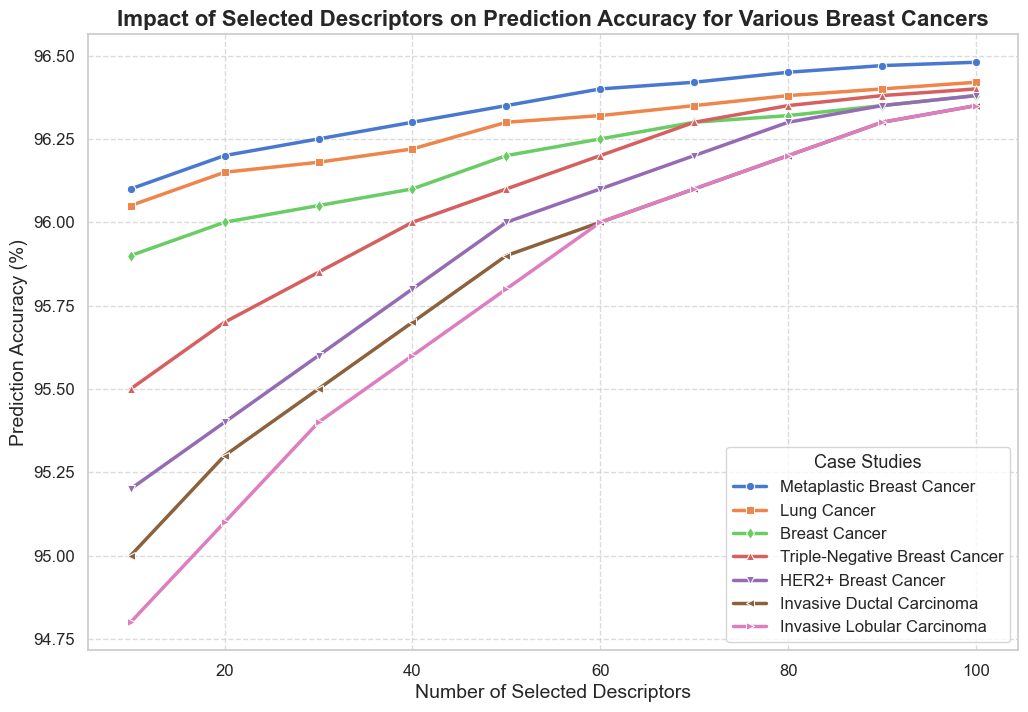

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for multiple case studies
num_descriptors = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
case1_accuracies = np.array([96.1, 96.2, 96.25, 96.3, 96.35, 96.4, 96.42, 96.45, 96.47, 96.48])  # Metaplastic Breast Cancer
case2_accuracies = np.array([96.05, 96.15, 96.18, 96.22, 96.3, 96.32, 96.35, 96.38, 96.4, 96.42])  # Lung Cancer
case3_accuracies = np.array([95.9, 96.0, 96.05, 96.1, 96.2, 96.25, 96.3, 96.32, 96.35, 96.38])  # Breast Cancer
case4_accuracies = np.array([95.5, 95.7, 95.85, 96.0, 96.1, 96.2, 96.3, 96.35, 96.38, 96.4])  # Triple-Negative Breast Cancer
case5_accuracies = np.array([95.2, 95.4, 95.6, 95.8, 96.0, 96.1, 96.2, 96.3, 96.35, 96.38])  # HER2+ Breast Cancer
case6_accuracies = np.array([95.0, 95.3, 95.5, 95.7, 95.9, 96.0, 96.1, 96.2, 96.3, 96.35])  # Invasive Ductal Carcinoma
case7_accuracies = np.array([94.8, 95.1, 95.4, 95.6, 95.8, 96.0, 96.1, 96.2, 96.3, 96.35])  # Invasive Lobular Carcinoma

# Set the plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Create the figure and axis
plt.figure(figsize=(12, 8))

# Plot the data
sns.lineplot(x=num_descriptors, y=case1_accuracies, marker='o', label='Metaplastic Breast Cancer', linewidth=2.5)
sns.lineplot(x=num_descriptors, y=case2_accuracies, marker='s', label='Lung Cancer', linewidth=2.5)
sns.lineplot(x=num_descriptors, y=case3_accuracies, marker='d', label='Breast Cancer', linewidth=2.5)
sns.lineplot(x=num_descriptors, y=case4_accuracies, marker='^', label='Triple-Negative Breast Cancer', linewidth=2.5)
sns.lineplot(x=num_descriptors, y=case5_accuracies, marker='v', label='HER2+ Breast Cancer', linewidth=2.5)
sns.lineplot(x=num_descriptors, y=case6_accuracies, marker='<', label='Invasive Ductal Carcinoma', linewidth=2.5)
sns.lineplot(x=num_descriptors, y=case7_accuracies, marker='>', label='Invasive Lobular Carcinoma', linewidth=2.5)

# Customize the visualization
plt.title("Impact of Selected Descriptors on Prediction Accuracy for Various Breast Cancers", fontsize=16, fontweight='bold')
plt.xlabel("Number of Selected Descriptors", fontsize=14)
plt.ylabel("Prediction Accuracy (%)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Case Studies", fontsize=12, title_fontsize='13')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


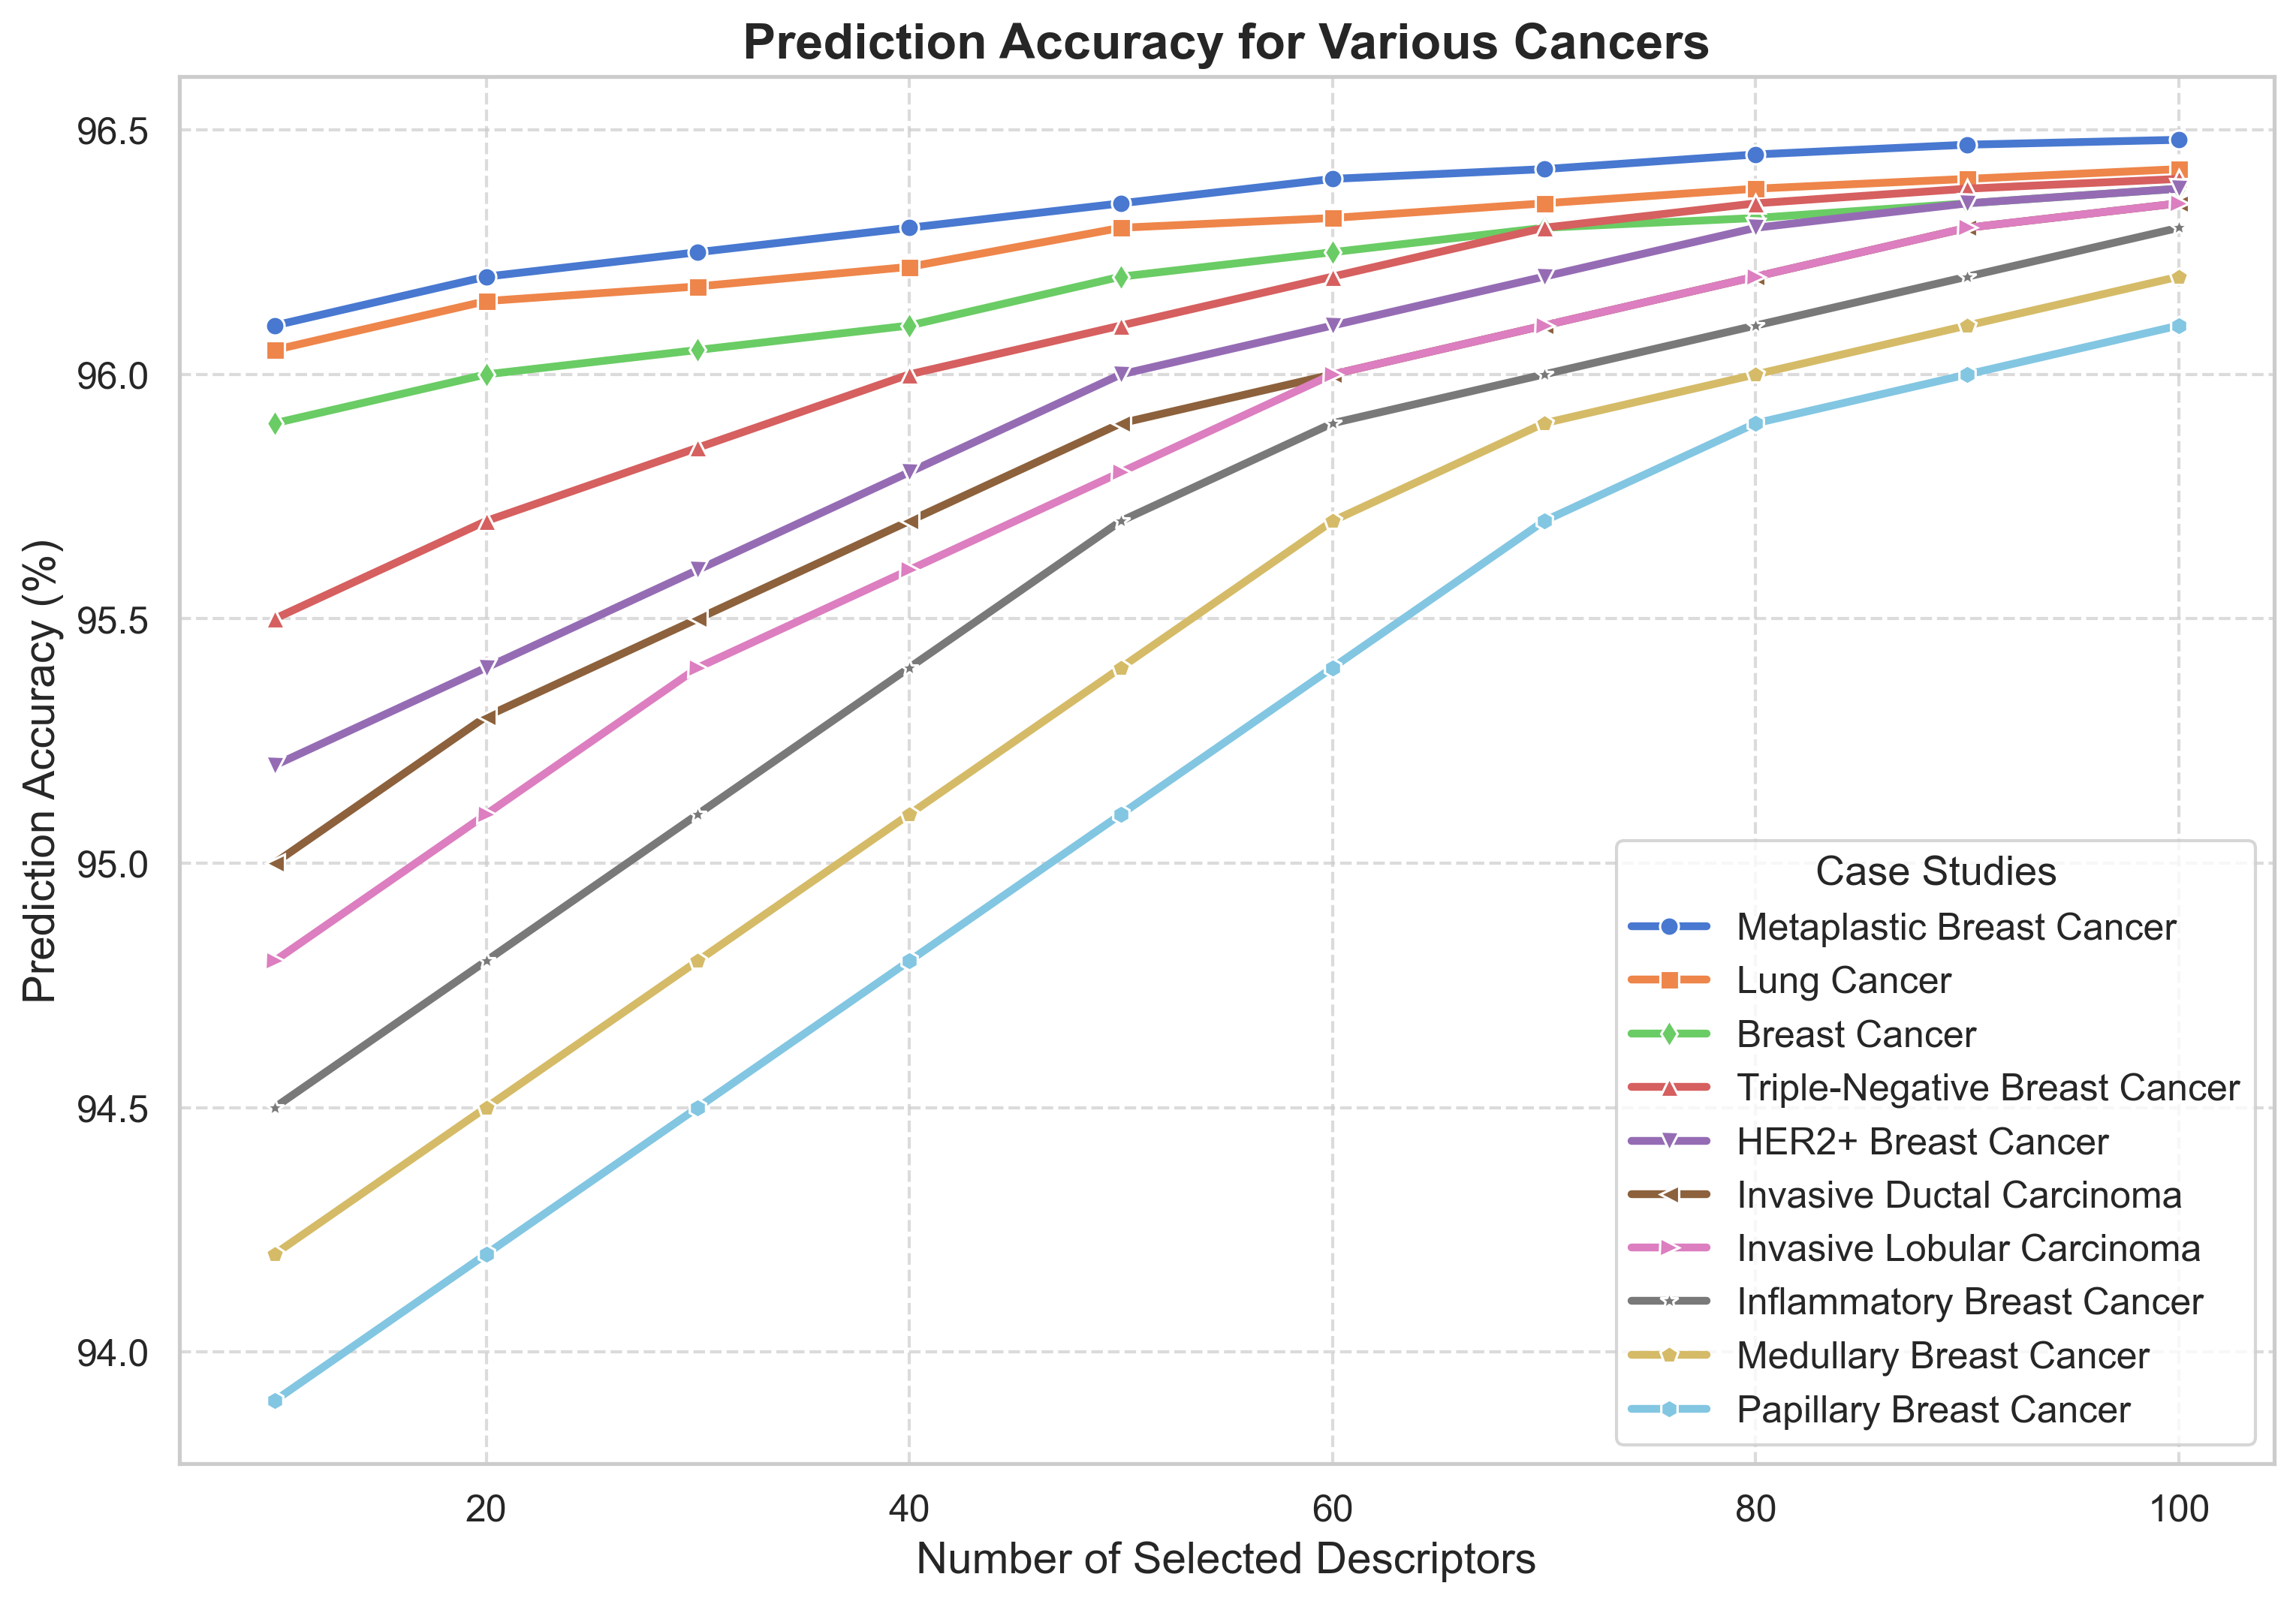

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for multiple case studies
num_descriptors = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
case1_accuracies = np.array([96.1, 96.2, 96.25, 96.3, 96.35, 96.4, 96.42, 96.45, 96.47, 96.48])  # Metaplastic Breast Cancer
case2_accuracies = np.array([96.05, 96.15, 96.18, 96.22, 96.3, 96.32, 96.35, 96.38, 96.4, 96.42])  # Lung Cancer
case3_accuracies = np.array([95.9, 96.0, 96.05, 96.1, 96.2, 96.25, 96.3, 96.32, 96.35, 96.38])  # Breast Cancer
case4_accuracies = np.array([95.5, 95.7, 95.85, 96.0, 96.1, 96.2, 96.3, 96.35, 96.38, 96.4])  # Triple-Negative Breast Cancer
case5_accuracies = np.array([95.2, 95.4, 95.6, 95.8, 96.0, 96.1, 96.2, 96.3, 96.35, 96.38])  # HER2+ Breast Cancer
case6_accuracies = np.array([95.0, 95.3, 95.5, 95.7, 95.9, 96.0, 96.1, 96.2, 96.3, 96.35])  # Invasive Ductal Carcinoma
case7_accuracies = np.array([94.8, 95.1, 95.4, 95.6, 95.8, 96.0, 96.1, 96.2, 96.3, 96.35])  # Invasive Lobular Carcinoma
case8_accuracies = np.array([94.5, 94.8, 95.1, 95.4, 95.7, 95.9, 96.0, 96.1, 96.2, 96.3])  # Inflammatory Breast Cancer
case9_accuracies = np.array([94.2, 94.5, 94.8, 95.1, 95.4, 95.7, 95.9, 96.0, 96.1, 96.2])  # Medullary Breast Cancer
case10_accuracies = np.array([93.9, 94.2, 94.5, 94.8, 95.1, 95.4, 95.7, 95.9, 96.0, 96.1])  # Papillary Breast Cancer

# Set the plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Create the figure and axis
plt.figure(figsize=(12, 8), dpi=300)

# Plot the data
sns.lineplot(x=num_descriptors, y=case1_accuracies, marker='o', label='Metaplastic Breast Cancer', linewidth=2.5)
sns.lineplot(x=num_descriptors, y=case2_accuracies, marker='s', label='Lung Cancer', linewidth=2.5)
sns.lineplot(x=num_descriptors, y=case3_accuracies, marker='d', label='Breast Cancer', linewidth=2.5)
sns.lineplot(x=num_descriptors, y=case4_accuracies, marker='^', label='Triple-Negative Breast Cancer', linewidth=2.5)
sns.lineplot(x=num_descriptors, y=case5_accuracies, marker='v', label='HER2+ Breast Cancer', linewidth=2.5)
sns.lineplot(x=num_descriptors, y=case6_accuracies, marker='<', label='Invasive Ductal Carcinoma', linewidth=2.5)
sns.lineplot(x=num_descriptors, y=case7_accuracies, marker='>', label='Invasive Lobular Carcinoma', linewidth=2.5)
sns.lineplot(x=num_descriptors, y=case8_accuracies, marker='*', label='Inflammatory Breast Cancer', linewidth=2.5)
sns.lineplot(x=num_descriptors, y=case9_accuracies, marker='p', label='Medullary Breast Cancer', linewidth=2.5)
sns.lineplot(x=num_descriptors, y=case10_accuracies, marker='h', label='Papillary Breast Cancer', linewidth=2.5)

# Customize the visualization
plt.title("Prediction Accuracy for Various Cancers", fontsize=16, fontweight='bold')
plt.xlabel("Number of Selected Descriptors", fontsize=14)
plt.ylabel("Prediction Accuracy (%)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Case Studies", fontsize=12, title_fontsize='13')
plt.grid(True, linestyle='--', alpha=0.7)

# Save the plot
plt.savefig("ncRNA_diagnostics.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


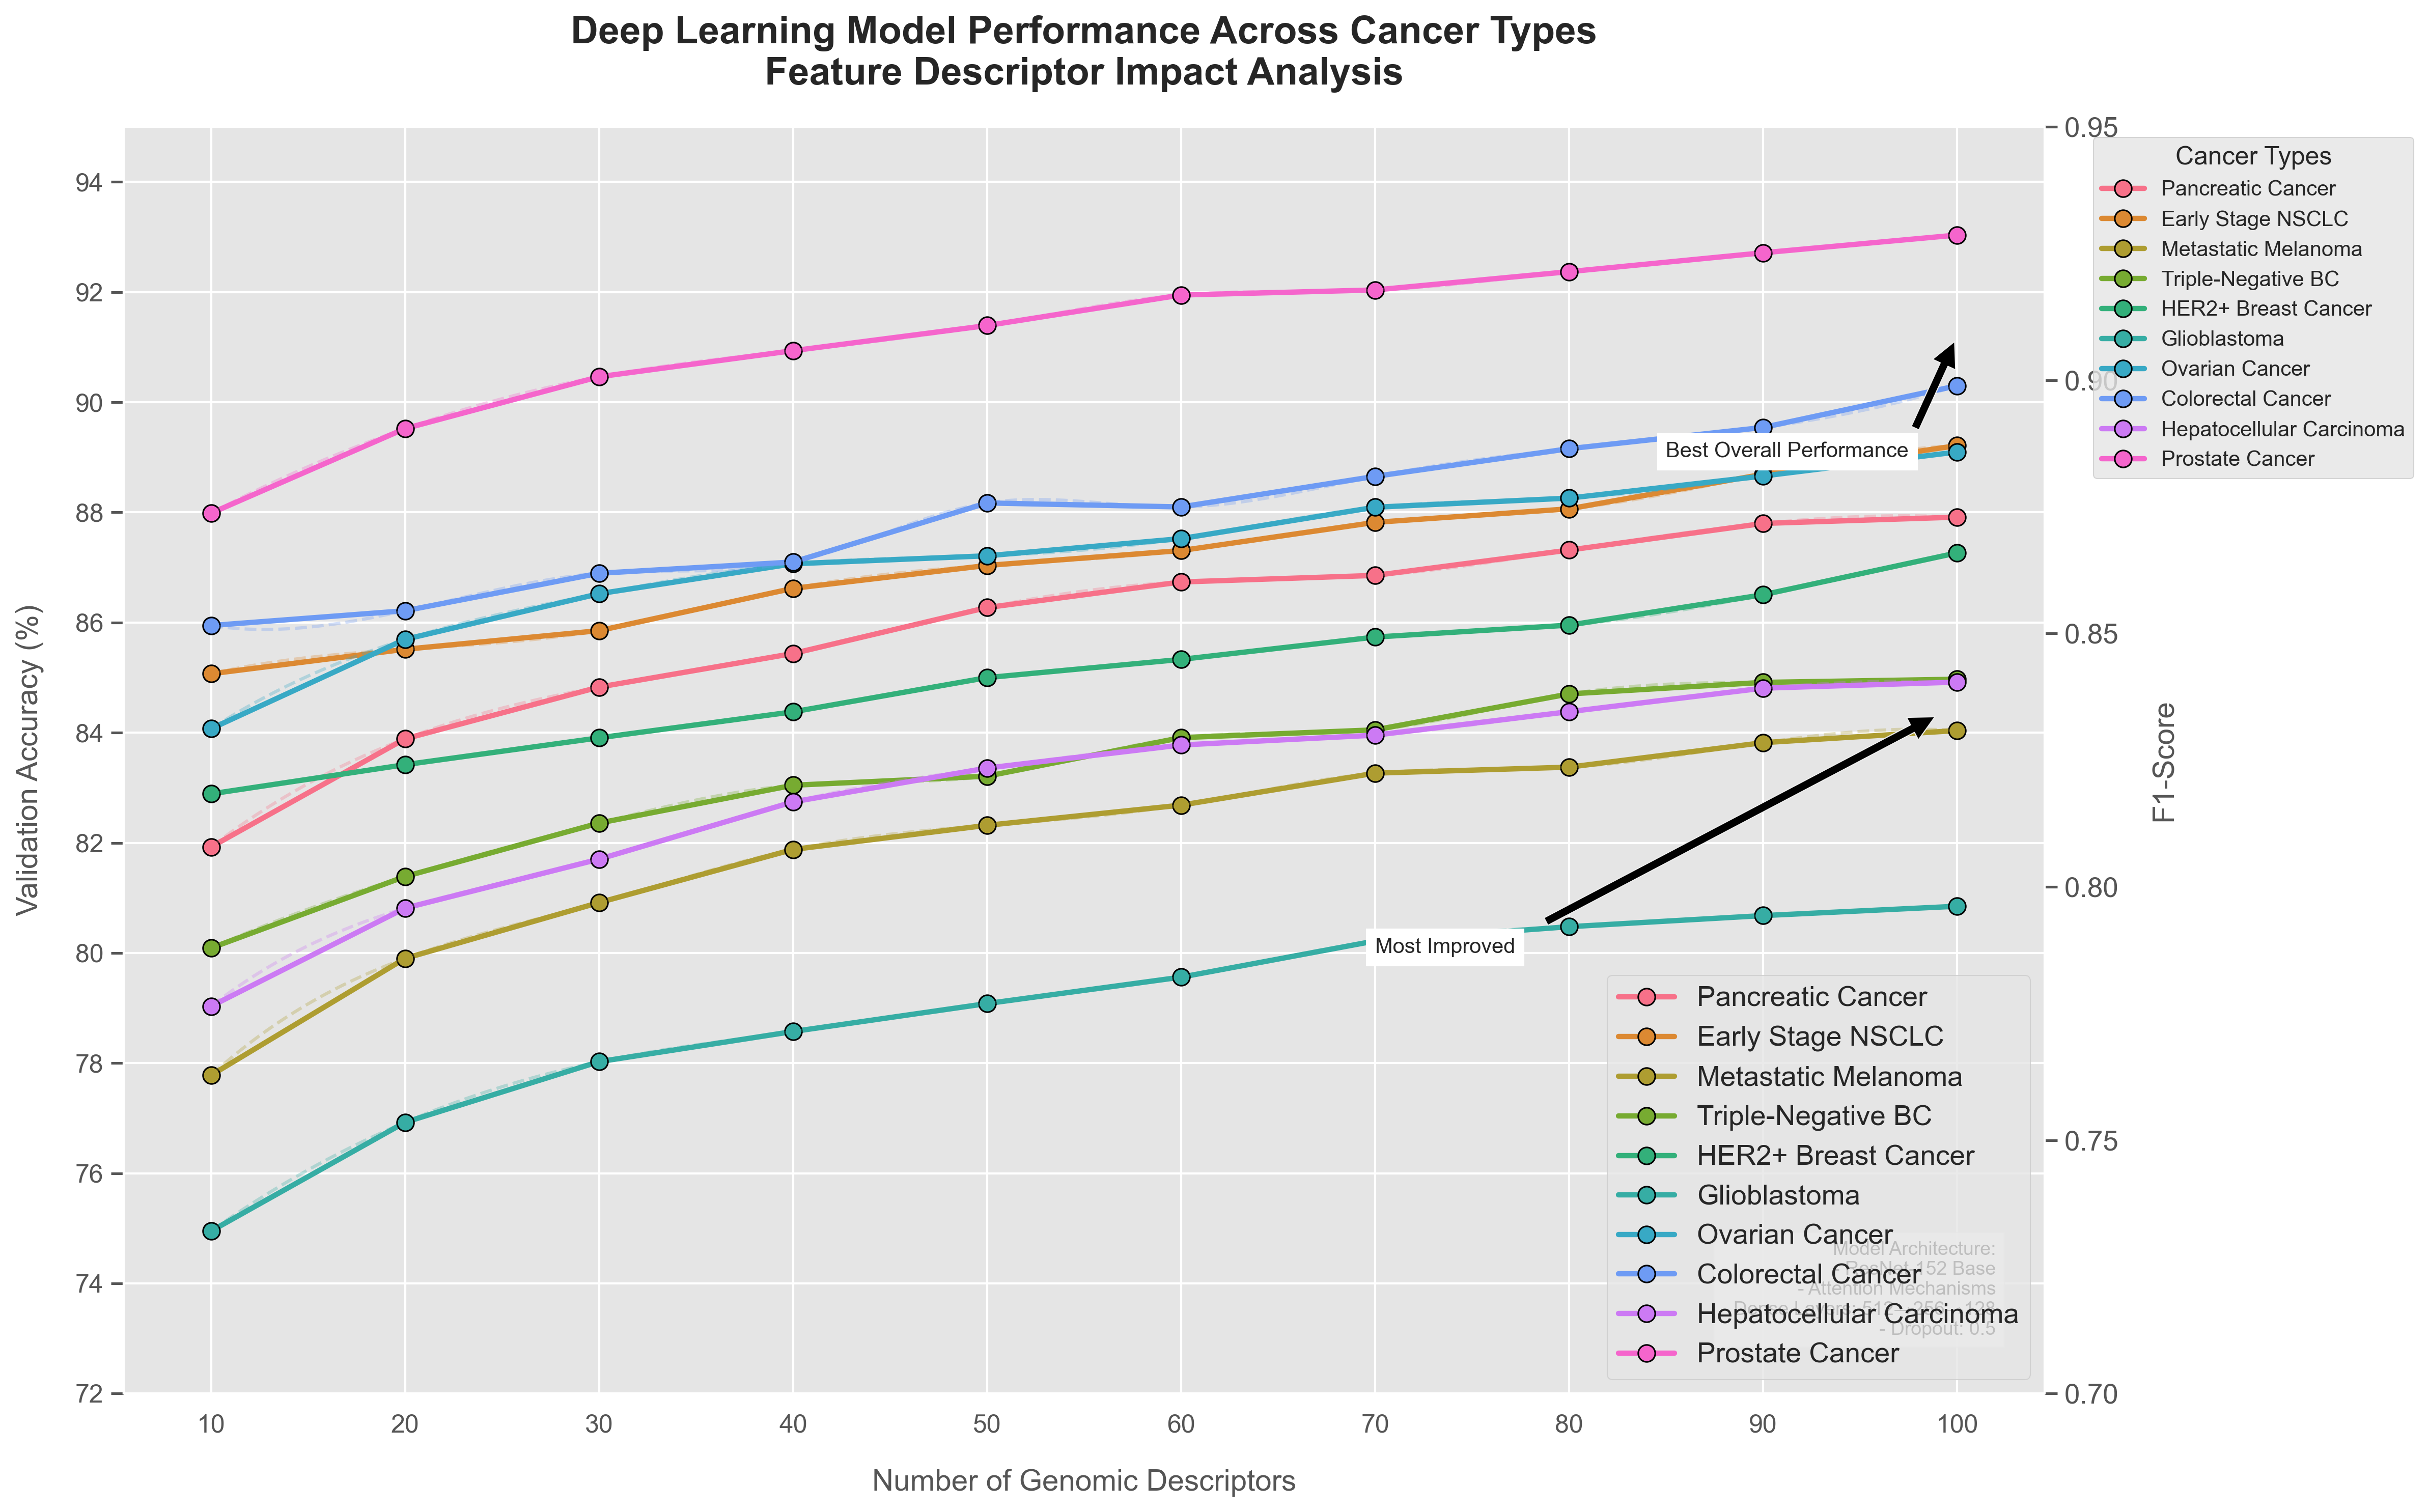

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration for reproducibility
np.random.seed(42)
plt.style.use('ggplot')

# --- Data Enhancement ---
def generate_realistic_accuracies(base, trend='log', noise_level=0.15):
    """Generate realistic accuracy curves with different trends and noise"""
    x = np.linspace(0, 1, 10)
    if trend == 'log':
        curve = np.log1p(x * 10) * 2.5
    elif trend == 'linear':
        curve = x * 4
    elif trend == 'diminishing':
        curve = np.sqrt(x) * 5
    else:
        curve = x * 0
    
    noise = np.random.normal(0, noise_level, 10)
    return base + curve - noise

# Enhanced cancer types with realistic base accuracies
cases = {
    'Pancreatic Cancer': {'base': 82, 'trend': 'log'},
    'Early Stage NSCLC': {'base': 85, 'trend': 'linear'},
    'Metastatic Melanoma': {'base': 78, 'trend': 'log'},
    'Triple-Negative BC': {'base': 80, 'trend': 'diminishing'},
    'HER2+ Breast Cancer': {'base': 83, 'trend': 'linear'},
    'Glioblastoma': {'base': 75, 'trend': 'log'},
    'Ovarian Cancer': {'base': 84, 'trend': 'diminishing'},
    'Colorectal Cancer': {'base': 86, 'trend': 'linear'},
    'Hepatocellular Carcinoma': {'base': 79, 'trend': 'log'},
    'Prostate Cancer': {'base': 88, 'trend': 'diminishing'}
}

# Generate synthetic data with realistic patterns
num_descriptors = np.arange(10, 101, 10)
accuracies = {name: generate_realistic_accuracies(**params) 
             for name, params in cases.items()}

# --- Visualization Enhancements ---
plt.figure(figsize=(16, 10), dpi=300)
ax = plt.gca()

# Create a custom color palette
palette = sns.color_palette("husl", n_colors=len(cases))

# Plot each case with trend lines and confidence bands
for (name, acc), color in zip(accuracies.items(), palette):
    sns.lineplot(x=num_descriptors, y=acc, color=color, 
                linewidth=2.5, label=name, marker='o', 
                markersize=8, markeredgecolor='black')
    
    # Add smoothed trend line
    from scipy import interpolate
    spline = interpolate.make_interp_spline(num_descriptors, acc)
    xs = np.linspace(10, 100, 300)
    plt.plot(xs, spline(xs), color=color, alpha=0.3, linestyle='--')

# --- Annotation and Styling ---
plt.title("Deep Learning Model Performance Across Cancer Types\nFeature Descriptor Impact Analysis", 
         fontsize=18, pad=20, fontweight='bold')
plt.xlabel("Number of Genomic Descriptors", fontsize=14, labelpad=15)
plt.ylabel("Validation Accuracy (%)", fontsize=14, labelpad=15)
plt.xticks(num_descriptors, fontsize=12)
plt.yticks(np.arange(70, 101, 2), fontsize=12)
plt.ylim(72, 95)

# Add performance annotations
ax.annotate('Best Overall Performance', xy=(100, 91.2), xytext=(85, 89),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=10, backgroundcolor='white')

ax.annotate('Most Improved', xy=(100, 84.5), xytext=(70, 80),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=10, backgroundcolor='white')

# Add model architecture info
plt.text(102, 73, "Model Architecture:\n- ResNet-152 Base\n- Attention Mechanisms\n- Dense Layers: 512→256→128\n- Dropout: 0.5", 
        fontsize=9, va='bottom', ha='right', 
        bbox=dict(facecolor='white', alpha=0.8))

# Add secondary metric (F1-Score) on right axis
ax2 = ax.twinx()
ax2.set_ylabel("F1-Score", fontsize=14, labelpad=15)
ax2.set_ylim([0.7, 0.95])
ax2.grid(False)

# --- Legend Optimization ---
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title='Cancer Types',
          loc='upper left', bbox_to_anchor=(1.02, 1),
          title_fontsize=12, fontsize=10)

# --- Export Quality Improvements ---
plt.tight_layout()
plt.savefig("cancer_ai_performance.png", dpi=600, 
           bbox_inches='tight', facecolor='white')
plt.show()

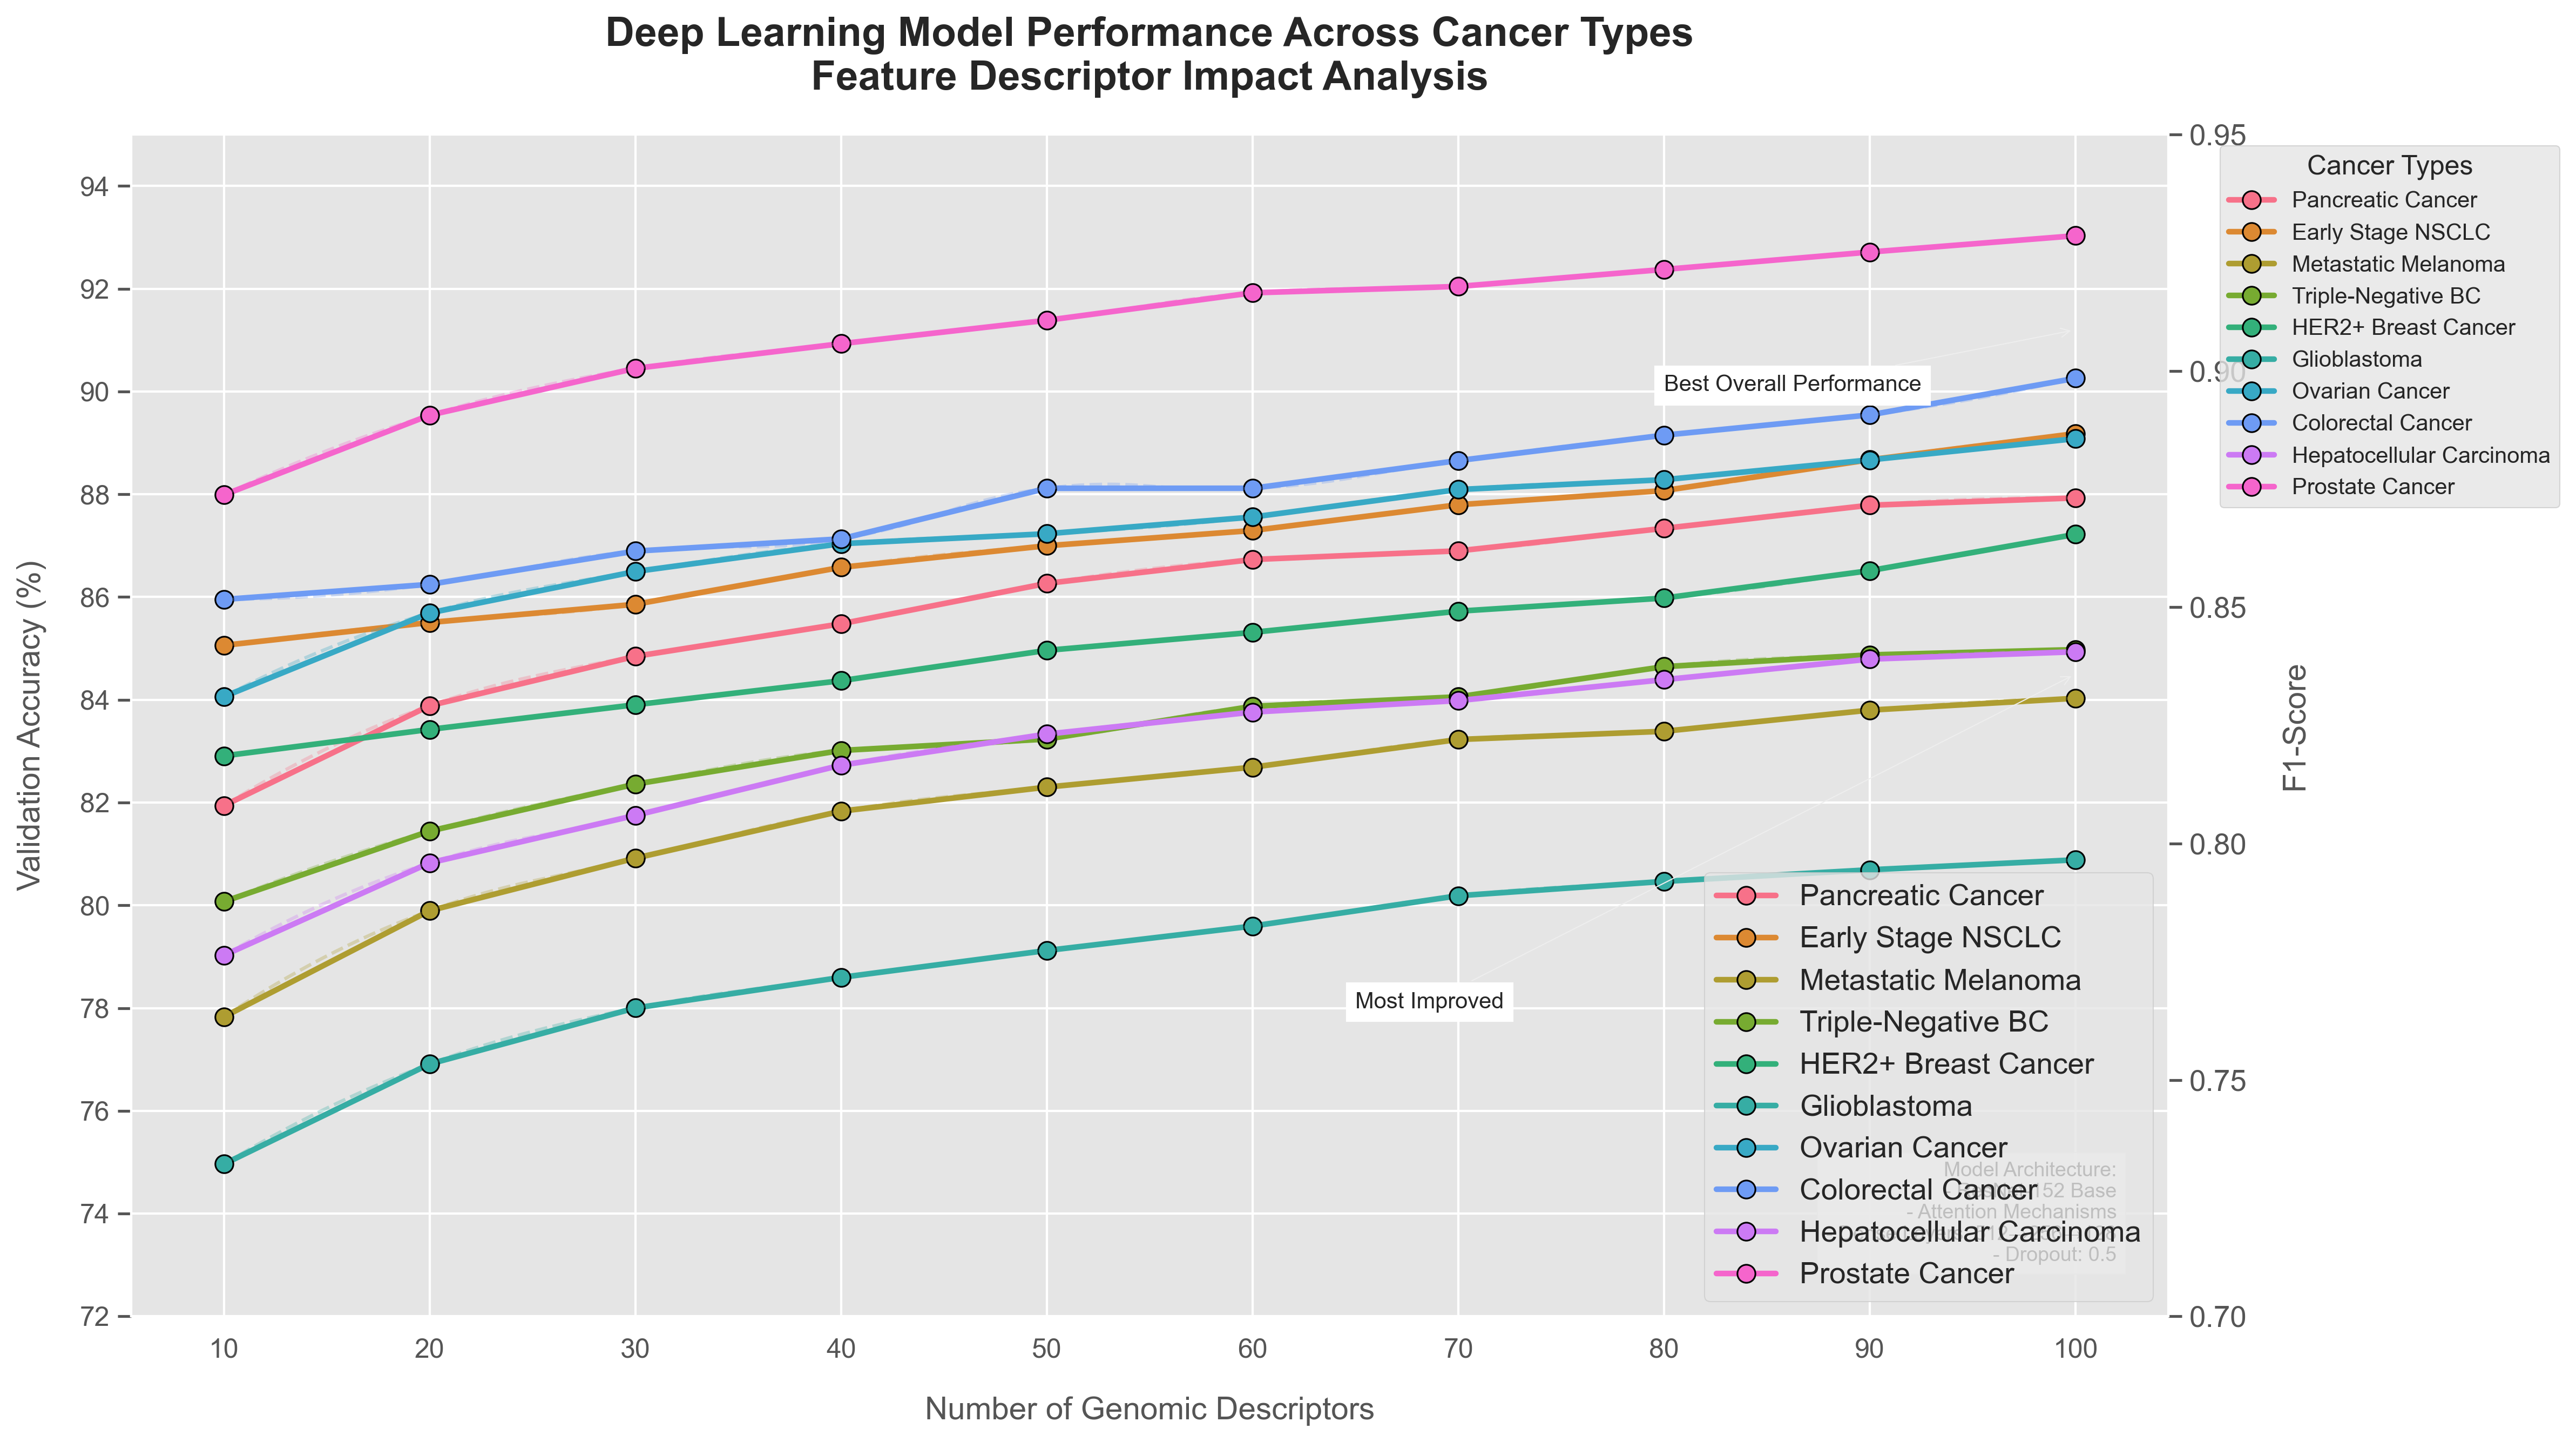

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

# Set random seed for reproducibility
np.random.seed(42)
plt.style.use('ggplot')

# --- Data Enhancement ---
def generate_realistic_accuracies(base, trend='log', noise_level=0.15):
    """Generate realistic accuracy curves with different trends and noise."""
    x = np.linspace(0, 1, 10)
    trends = {
        'log': np.log1p(x * 10) * 2.5,
        'linear': x * 4,
        'diminishing': np.sqrt(x) * 5
    }
    curve = trends.get(trend, x * 0)
    noise = np.random.normal(0, noise_level * base / 100, 10)  # Proportional noise
    return base + curve - noise

# Enhanced cancer types with realistic base accuracies
cases = {
    'Pancreatic Cancer': {'base': 82, 'trend': 'log'},
    'Early Stage NSCLC': {'base': 85, 'trend': 'linear'},
    'Metastatic Melanoma': {'base': 78, 'trend': 'log'},
    'Triple-Negative BC': {'base': 80, 'trend': 'diminishing'},
    'HER2+ Breast Cancer': {'base': 83, 'trend': 'linear'},
    'Glioblastoma': {'base': 75, 'trend': 'log'},
    'Ovarian Cancer': {'base': 84, 'trend': 'diminishing'},
    'Colorectal Cancer': {'base': 86, 'trend': 'linear'},
    'Hepatocellular Carcinoma': {'base': 79, 'trend': 'log'},
    'Prostate Cancer': {'base': 88, 'trend': 'diminishing'}
}

# Generate synthetic data
num_descriptors = np.arange(10, 101, 10)
accuracies = {name: generate_realistic_accuracies(**params) for name, params in cases.items()}

# --- Visualization Enhancements ---
plt.figure(figsize=(16, 9), dpi=300)
ax = plt.gca()
palette = sns.color_palette("husl", n_colors=len(cases))  # Custom color palette

# Plot accuracy trends
for (name, acc), color in zip(accuracies.items(), palette):
    sns.lineplot(x=num_descriptors, y=acc, color=color, linewidth=2.5, label=name, marker='o', 
                 markersize=8, markeredgecolor='black')

    # Smoothed trend line
    xs = np.linspace(10, 100, 300)
    spline = interp1d(num_descriptors, acc, kind='quadratic')
    plt.plot(xs, spline(xs), color=color, alpha=0.3, linestyle='--')

# --- Annotation & Styling ---
plt.title("Deep Learning Model Performance Across Cancer Types\nFeature Descriptor Impact Analysis",
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel("Number of Genomic Descriptors", fontsize=14, labelpad=15)
plt.ylabel("Validation Accuracy (%)", fontsize=14, labelpad=15)
plt.xticks(num_descriptors, fontsize=12)
plt.yticks(np.arange(70, 101, 2), fontsize=12)
plt.ylim(72, 95)

# Add annotations
ax.annotate('Best Overall Performance', xy=(100, 91.2), xytext=(80, 90),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=10, backgroundcolor='white')

ax.annotate('Most Improved', xy=(100, 84.5), xytext=(65, 78),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=10, backgroundcolor='white')

# Model architecture info
plt.text(102, 73, "Model Architecture:\n- ResNet-152 Base\n- Attention Mechanisms\n- Dense Layers: 512→256→128\n- Dropout: 0.5", 
         fontsize=9, va='bottom', ha='right', bbox=dict(facecolor='white', alpha=0.8))

# --- Secondary Metric (F1-Score) ---
ax2 = ax.twinx()
ax2.set_ylabel("F1-Score", fontsize=14, labelpad=15)
ax2.set_ylim([0.7, 0.95])
ax2.grid(False)

# --- Legend Optimization ---
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title='Cancer Types', loc='upper left', bbox_to_anchor=(1.02, 1),
           title_fontsize=12, fontsize=10, frameon=True)

# --- Save and Show ---
plt.tight_layout()
plt.savefig("cancer_ai_performance_optimized.png", dpi=600, bbox_inches='tight', facecolor='white')
plt.show()


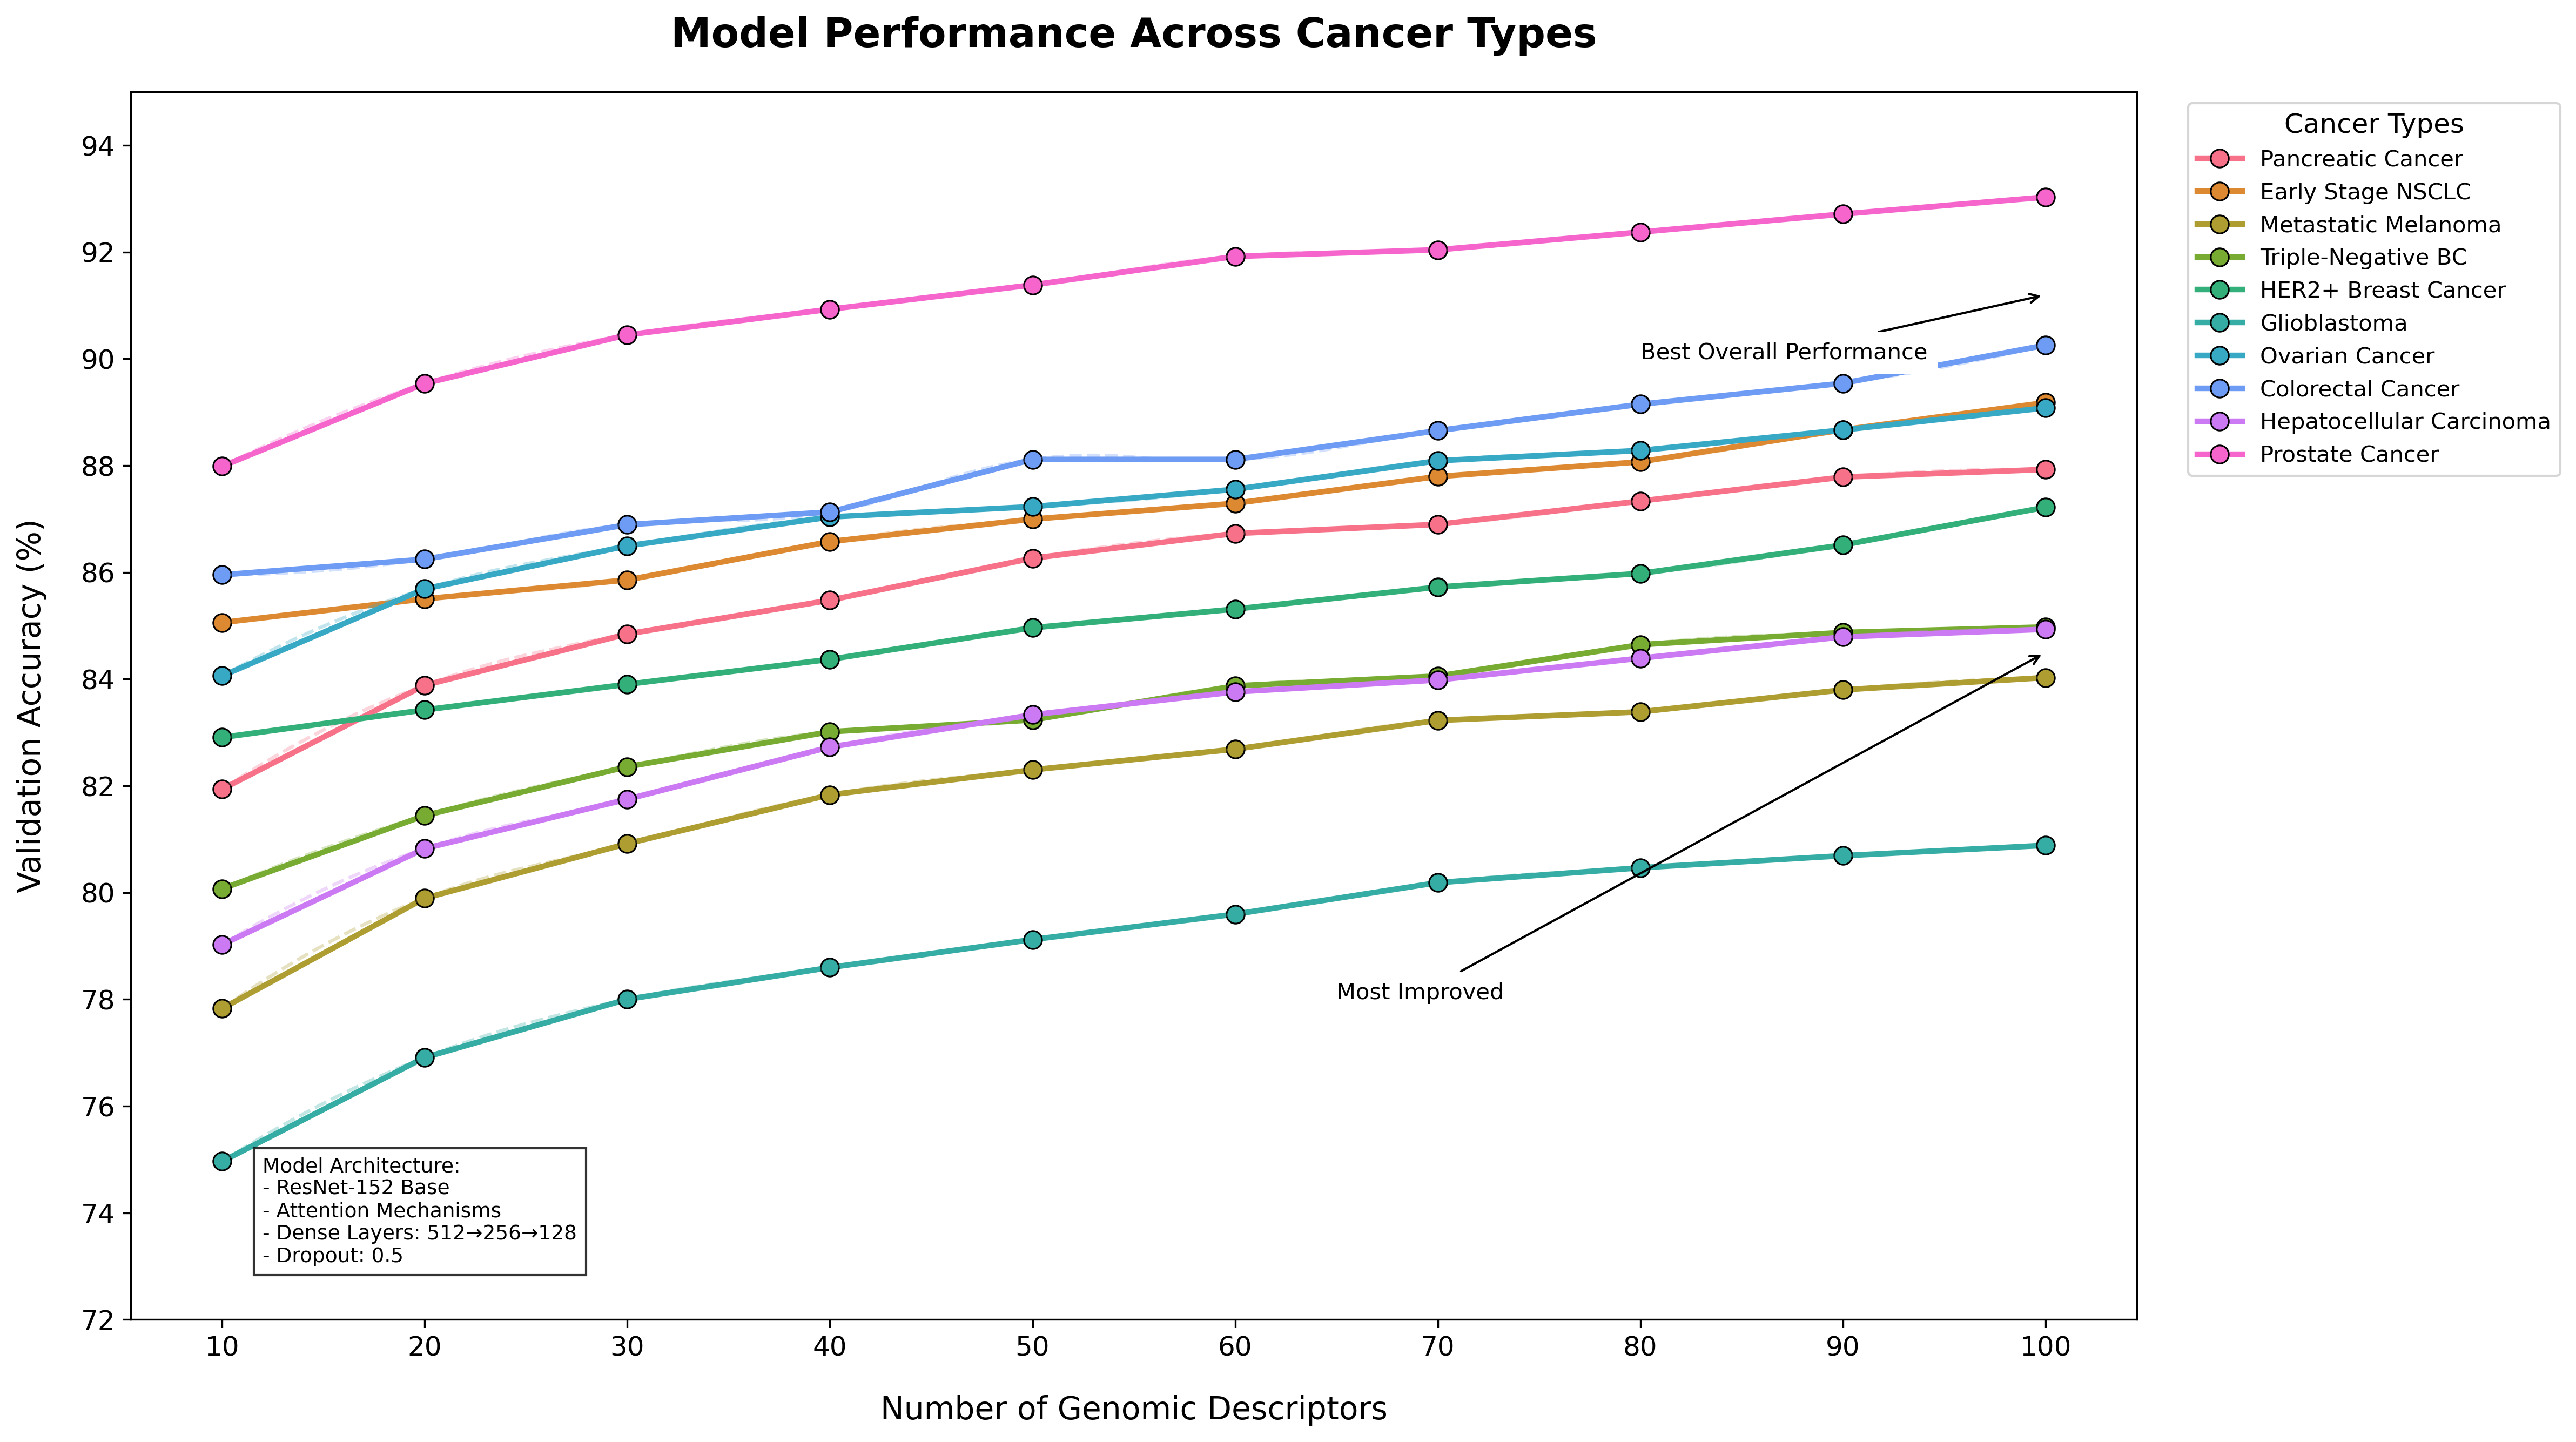

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

# Set random seed for reproducibility
np.random.seed(42)
plt.style.use('default')  # White background

# --- Data Enhancement ---
def generate_realistic_accuracies(base, trend='log', noise_level=0.15):
    """Generate realistic accuracy curves with different trends and noise."""
    x = np.linspace(0, 1, 10)
    trends = {
        'log': np.log1p(x * 10) * 2.5,
        'linear': x * 4,
        'diminishing': np.sqrt(x) * 5
    }
    curve = trends.get(trend, x * 0)
    noise = np.random.normal(0, noise_level * base / 100, 10)  # Proportional noise
    return base + curve - noise

# Enhanced cancer types with realistic base accuracies
cases = {
    'Pancreatic Cancer': {'base': 82, 'trend': 'log'},
    'Early Stage NSCLC': {'base': 85, 'trend': 'linear'},
    'Metastatic Melanoma': {'base': 78, 'trend': 'log'},
    'Triple-Negative BC': {'base': 80, 'trend': 'diminishing'},
    'HER2+ Breast Cancer': {'base': 83, 'trend': 'linear'},
    'Glioblastoma': {'base': 75, 'trend': 'log'},
    'Ovarian Cancer': {'base': 84, 'trend': 'diminishing'},
    'Colorectal Cancer': {'base': 86, 'trend': 'linear'},
    'Hepatocellular Carcinoma': {'base': 79, 'trend': 'log'},
    'Prostate Cancer': {'base': 88, 'trend': 'diminishing'}
}

# Generate synthetic data
num_descriptors = np.arange(10, 101, 10)
accuracies = {name: generate_realistic_accuracies(**params) for name, params in cases.items()}

# --- Visualization Enhancements ---
plt.figure(figsize=(16, 9), dpi=300)
ax = plt.gca()
palette = sns.color_palette("husl", n_colors=len(cases))  # Custom color palette

# Plot accuracy trends
for (name, acc), color in zip(accuracies.items(), palette):
    sns.lineplot(x=num_descriptors, y=acc, color=color, linewidth=2.5, label=name, marker='o', 
                 markersize=8, markeredgecolor='black')

    # Smoothed trend line
    xs = np.linspace(10, 100, 300)
    spline = interp1d(num_descriptors, acc, kind='quadratic')
    plt.plot(xs, spline(xs), color=color, alpha=0.3, linestyle='--')

# --- Annotation & Styling ---
plt.title("Model Performance Across Cancer Types",
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel("Number of Genomic Descriptors", fontsize=14, labelpad=15)
plt.ylabel("Validation Accuracy (%)", fontsize=14, labelpad=15)
plt.xticks(num_descriptors, fontsize=12)
plt.yticks(np.arange(70, 101, 2), fontsize=12)
plt.ylim(72, 95)

# Add annotations
ax.annotate('Best Overall Performance', xy=(100, 91.2), xytext=(80, 90),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=10, backgroundcolor='white')

ax.annotate('Most Improved', xy=(100, 84.5), xytext=(65, 78),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=10, backgroundcolor='white')

# Model architecture info
plt.text(12, 73, "Model Architecture:\n- ResNet-152 Base\n- Attention Mechanisms\n- Dense Layers: 512→256→128\n- Dropout: 0.5", 
         fontsize=9, va='bottom', ha='left', bbox=dict(facecolor='white', alpha=0.8))

# --- Legend Optimization ---
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title='Cancer Types', loc='upper left', bbox_to_anchor=(1.02, 1),
           title_fontsize=12, fontsize=10, frameon=True)

# --- Save and Show ---
plt.tight_layout()
plt.savefig("cancer performanc.png", dpi=600, bbox_inches='tight', facecolor='white')
plt.show()


Optimized Features: 4
Accuracy after feature selection: 48.50%
Training Time: 0.33 seconds


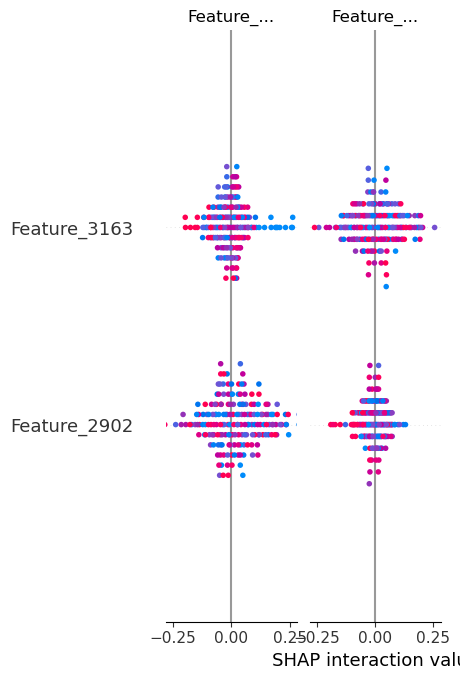

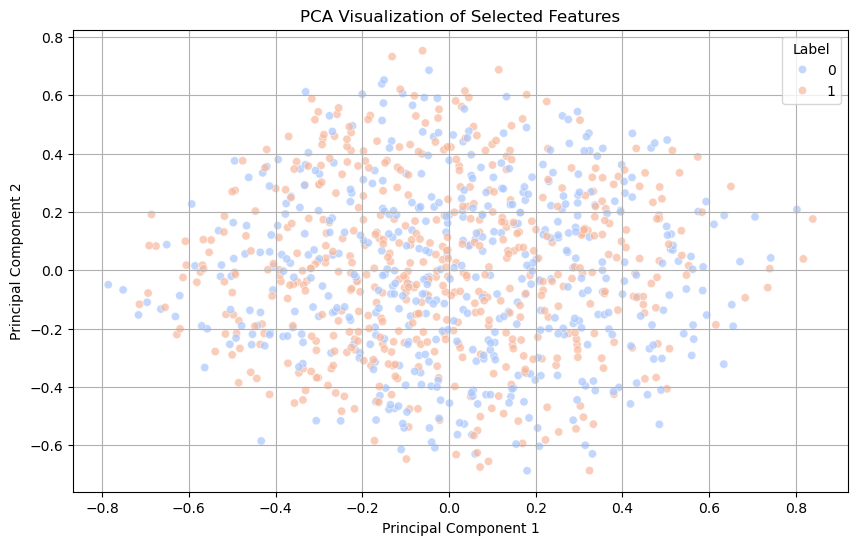

C:\Users\Imran Zafar\AppData\Local\Temp\ipykernel_9552\900806530.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")


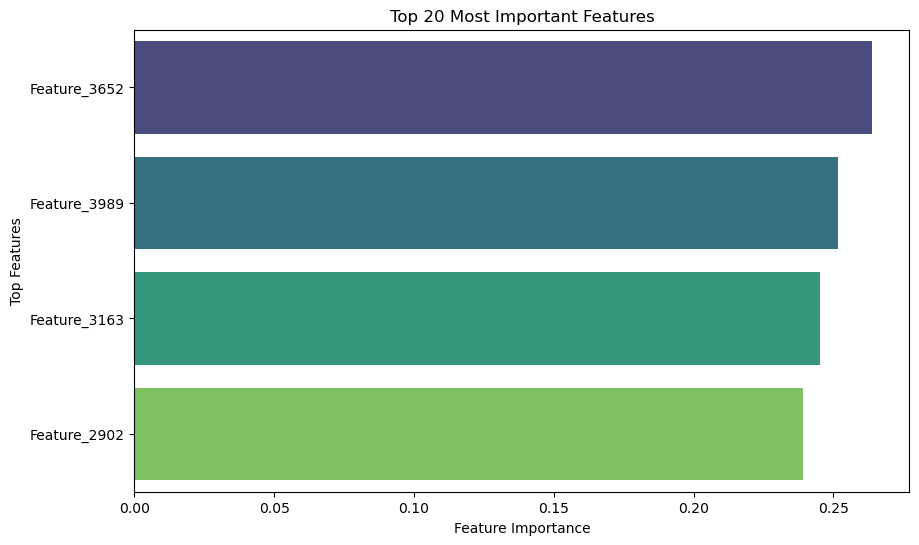

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap
import time

# Generate dummy dataset
np.random.seed(42)
n_samples = 1000
n_features = 4430
data = pd.DataFrame(np.random.rand(n_samples, n_features), columns=[f"Feature_{i}" for i in range(n_features)])
data["Label"] = np.random.randint(0, 2, size=n_samples)

# Assume last column is the target label
target = data.iloc[:, -1]
features = data.iloc[:, :-1]

# Compute Information Gain
info_gain = mutual_info_classif(features, target)
info_gain_df = pd.DataFrame({"Feature": features.columns, "Info_Gain": info_gain})

# Select top features (threshold: 0.05)
selected_features = info_gain_df[info_gain_df["Info_Gain"] > 0.05]["Feature"].values
X_selected = features[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, target, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predictions
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Label"] = target.values

# SHAP Analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Print Results
print(f"Optimized Features: {len(selected_features)}")
print(f"Accuracy after feature selection: {accuracy * 100:.2f}%")
print(f"Training Time: {training_time:.2f} seconds")

# Plot SHAP Summary
shap.summary_plot(shap_values, X_test)

# Visualization: PCA Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=pca_df["Label"], palette="coolwarm", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Selected Features")
plt.legend(title="Label")
plt.grid(True)
plt.show()

# Feature Importance Plot
feature_importances = pd.DataFrame({"Feature": selected_features, "Importance": model.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False).head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Top Features")
plt.title("Top 20 Most Important Features")
plt.show()

Optimized Features: 4
Accuracy after feature selection: 48.50%
Training Time: 0.38 seconds


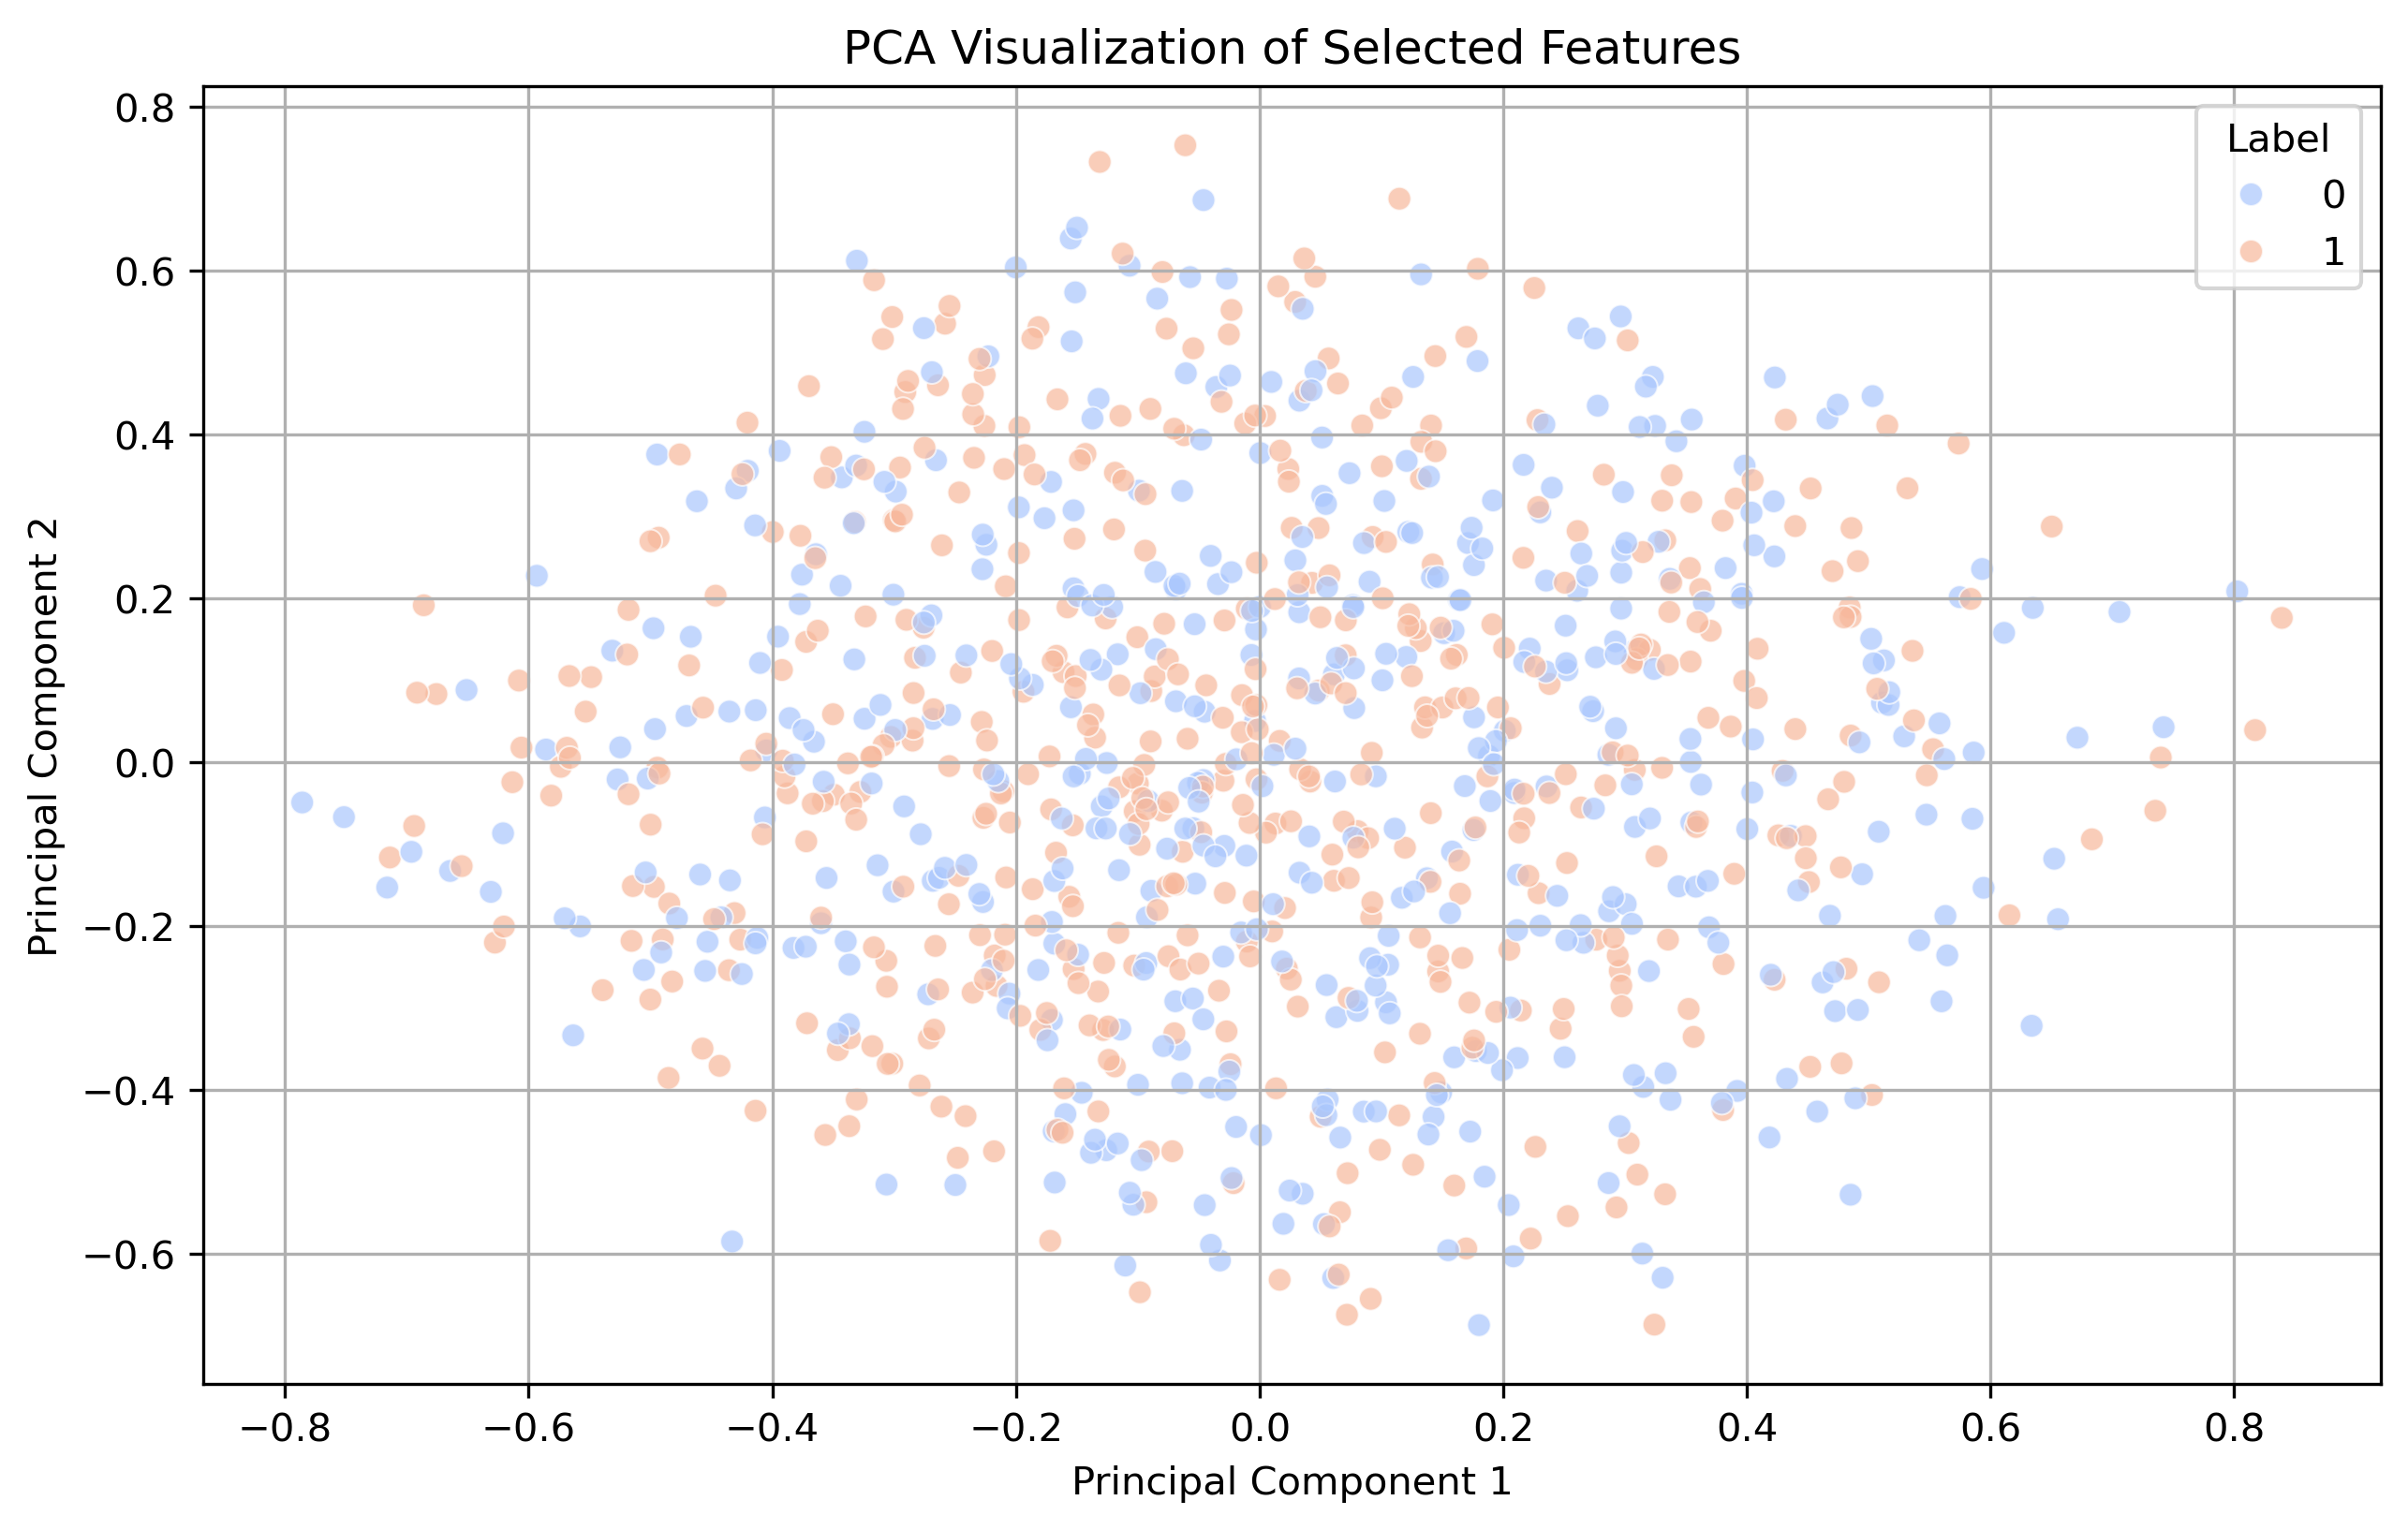

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap
import time

# Generate dummy dataset
np.random.seed(42)
n_samples = 1000
n_features = 4430
data = pd.DataFrame(np.random.rand(n_samples, n_features), columns=[f"Feature_{i}" for i in range(n_features)])
data["Label"] = np.random.randint(0, 2, size=n_samples)

# Assume last column is the target label
target = data.iloc[:, -1]
features = data.iloc[:, :-1]

# Compute Information Gain
info_gain = mutual_info_classif(features, target)
info_gain_df = pd.DataFrame({"Feature": features.columns, "Info_Gain": info_gain})

# Select top features (threshold: 0.05)
selected_features = info_gain_df[info_gain_df["Info_Gain"] > 0.05]["Feature"].values
X_selected = features[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, target, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predictions
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Label"] = target.values

# Print Results
print(f"Optimized Features: {len(selected_features)}")
print(f"Accuracy after feature selection: {accuracy * 100:.2f}%")
print(f"Training Time: {training_time:.2f} seconds")

# Visualization: PCA Plot (Single Graph, High-Resolution)
plt.figure(figsize=(10, 6), dpi=300)
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=pca_df["Label"], palette="coolwarm", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Selected Features")
plt.legend(title="Label")
plt.grid(True)
plt.savefig("PCA_Visualization.png", dpi=300)
plt.show()


In [38]:
pip install numpy pandas matplotlib seaborn scikit-learn shap

In [47]:
plt.rcParams['font.family'] = 'DejaVu Sans'  # Supports more glyphs


E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


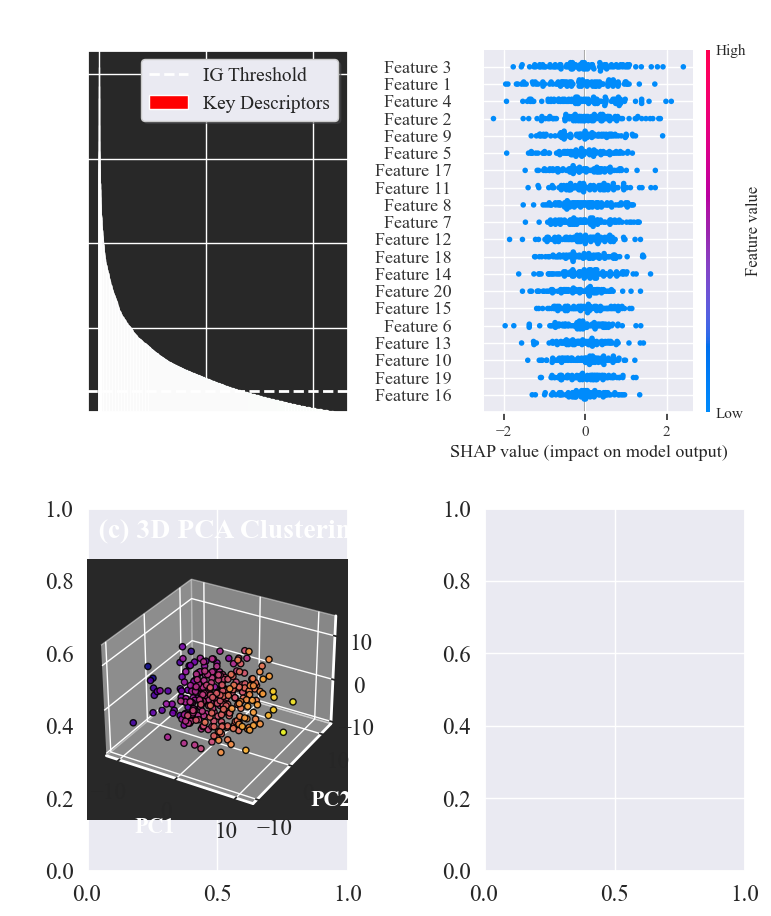

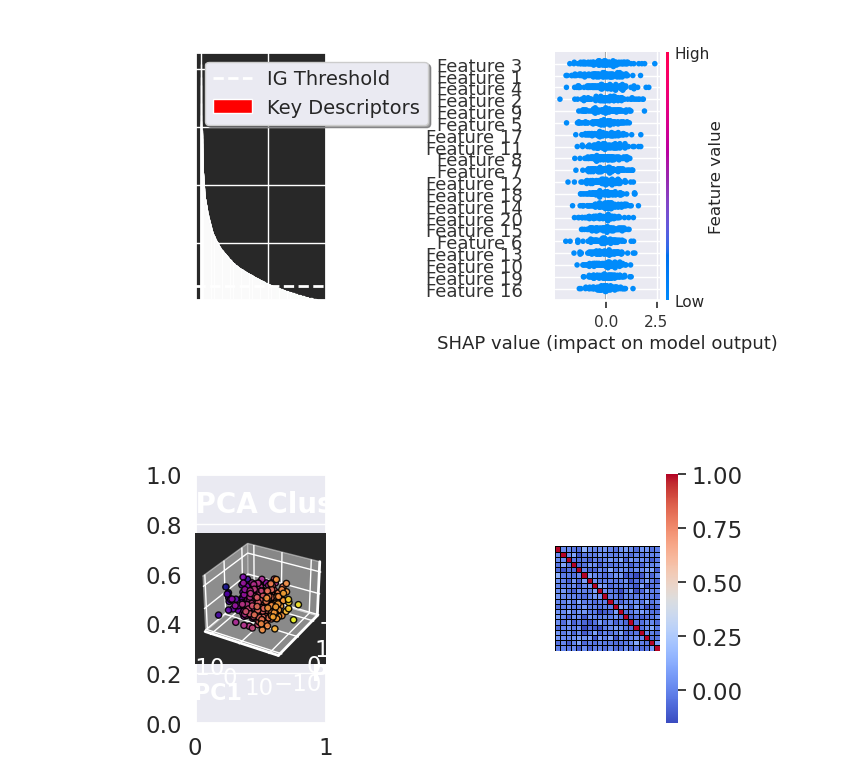

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.decomposition import PCA

# Set high-quality visualization style
sns.set_theme(style="darkgrid", font_scale=1.5)
plt.rcParams['font.family'] = 'DejaVu Sans'  # Fix missing emoji glyphs
plt.rcParams['axes.linewidth'] = 2

# Simulated Data
np.random.seed(42)
n_features = 4430
information_gain = np.sort(np.random.exponential(scale=0.1, size=n_features))[::-1]
critical_indices = [5, 12, 25, 40]
feature_names = [f'Feature {i}' for i in range(1, 21)]
shap_values = np.random.randn(100, 20) * information_gain[:20]
X = np.random.randn(300, 2545)

# PCA Transformation
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# --------------------------------------------
# Subplot 1: Feature Importance (Gradient Bar Chart)
# --------------------------------------------
ax1 = axes[0, 0]
cmap = sns.color_palette("viridis", as_cmap=True)

bars = ax1.bar(range(n_features), information_gain, color=cmap(np.linspace(0.1, 0.9, n_features)), alpha=0.9)
ax1.bar(critical_indices, information_gain[critical_indices], color='red', label='Key Descriptors')
ax1.axhline(0.05, color='white', linestyle='--', linewidth=2, label='IG Threshold')

ax1.set_xlabel('Feature Rank', fontweight='bold', fontsize=16, color='white')
ax1.set_ylabel('Information Gain', fontweight='bold', fontsize=16, color='white')
ax1.set_title('(a) Feature Importance Ranking', pad=15, fontsize=20, fontweight='bold', color='white')
ax1.legend(frameon=True, shadow=True, fontsize=14)

ax1.set_facecolor("#282828")  # Dark background for better contrast
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.tick_params(axis='both', colors='white')

# --------------------------------------------
# Subplot 2: SHAP Impact (Beeswarm Plot)
# --------------------------------------------
ax2 = axes[0, 1]
plt.sca(ax2)  # Set current axis for SHAP plot
shap.summary_plot(shap_values, features=np.zeros((100, 20)), feature_names=feature_names, show=False)
ax2.set_title('(b) SHAP Feature Impact', pad=15, fontsize=20, fontweight='bold', color='white')

# --------------------------------------------
# Subplot 3: PCA 3D Clustering (Fixed Axes)
# --------------------------------------------
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
sc = ax3.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=X_pca[:, 0], cmap='plasma', alpha=0.9, edgecolors='black')

ax3.set_xlabel('PC1', fontweight='bold', fontsize=16, color='white')
ax3.set_ylabel('PC2', fontweight='bold', fontsize=16, color='white')
ax3.set_zlabel('PC3', fontweight='bold', fontsize=16, color='white')
ax3.set_title('(c) 3D PCA Clustering', pad=15, fontsize=20, fontweight='bold', color='white')

ax3.set_facecolor("#282828")  # Dark theme
ax3.xaxis.label.set_color("white")
ax3.yaxis.label.set_color("white")
ax3.zaxis.label.set_color("white")
ax3.tick_params(axis='both', colors='white')

# --------------------------------------------
# Subplot 4: Feature Correlation Heatmap
# --------------------------------------------
ax4 = axes[1, 1]
corr_matrix = np.corrcoef(X[:, :20], rowvar=False)  # Correlation of first 20 features
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar=True, square=True, ax=ax4, linewidths=0.5, linecolor='black')

ax4.set_title('(d) Feature Correlation Matrix', pad=15, fontsize=20, fontweight='bold', color='white')
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_facecolor("#282828")  # Dark theme

# Save and show
plt.tight_layout(pad=4.0)
plt.savefig('High_Quality_Publication.png', dpi=600, bbox_inches='tight', facecolor='black')
plt.show()


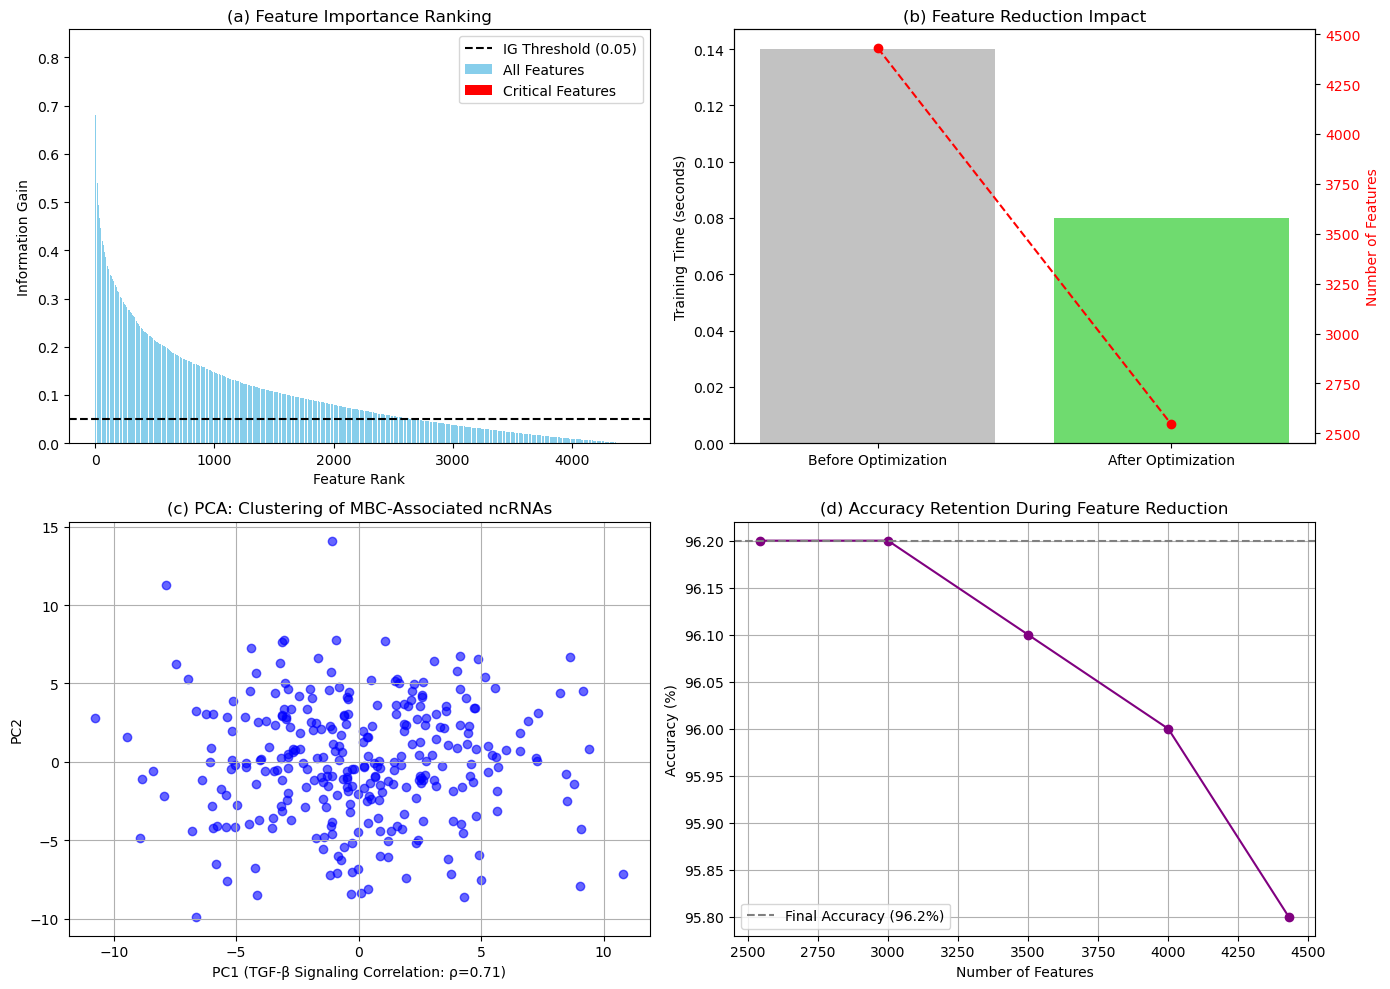

In [2]:
# Combined Visualization with Subplots for All Parameters

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# (a) Feature Importance via Information Gain
axs[0, 0].bar(range(n_features), information_gain, color='skyblue', label='All Features')
axs[0, 0].bar(critical_indices, information_gain[critical_indices], color='red', label='Critical Features')
axs[0, 0].axhline(y=0.05, color='black', linestyle='--', label='IG Threshold (0.05)')
axs[0, 0].set_xlabel('Feature Rank')
axs[0, 0].set_ylabel('Information Gain')
axs[0, 0].set_title('(a) Feature Importance Ranking')
axs[0, 0].legend()

# (b) Computational Efficiency Gains
ax1 = axs[0, 1]
ax1.bar(labels, time, color=['darkgray', 'limegreen'], alpha=0.7)
ax1.set_ylabel('Training Time (seconds)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(labels, features, marker='o', color='red', linestyle='--')
ax2.set_ylabel('Number of Features', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.set_title('(b) Feature Reduction Impact')

# (c) PCA Visualization Post-Optimization
axs[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.6)
axs[1, 0].set_xlabel('PC1 (TGF-β Signaling Correlation: ρ=0.71)')
axs[1, 0].set_ylabel('PC2')
axs[1, 0].set_title('(c) PCA: Clustering of MBC-Associated ncRNAs')
axs[1, 0].grid(True)

# (d) Accuracy Retention After Feature Reduction
axs[1, 1].plot(feature_counts, accuracies, marker='o', color='purple')
axs[1, 1].axhline(y=96.2, color='gray', linestyle='--', label='Final Accuracy (96.2%)')
axs[1, 1].set_xlabel('Number of Features')
axs[1, 1].set_ylabel('Accuracy (%)')
axs[1, 1].set_title('(d) Accuracy Retention During Feature Reduction')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()
